# Time evolution Plots

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
from scipy.optimize import curve_fit

from typing import Literal, Union

from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import matplotlib as mpl

from qs_mps.utils import create_sequential_colors, load_list_of_lists, anim, get_cx, get_cy

# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

font = {'family': 'serif', 'size': 20}
plt.rcParams.update({'font.family': font['family'], 'font.size': font['size']})

model = "Z2_dual"
path = "marcos"
# path = "pc"
cx = [3,37]
cy = [3,3]
# cx = None
# cy = None

if model == "Ising":
    model_path = "0_ISING"

elif model == "Z2_dual":
    model_path = "1_Z2"
    param_label = "h"
    boundcond = "obc"
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"

elif model == "ANNNI":
    model_path = "2_ANNNI"

elif model == "Cluster":
    model_path = "3_CLUSTER"
else:
    raise SyntaxError("Model not valid. Choose among 'Ising', 'Z2', 'ANNNI', 'Cluster'")
# take the path and precision to save files
# if we want to save the tensors we save them locally because they occupy a lot of memory
if path == "pc":
    path_tensor = f"C:/Users/HP/Desktop/projects/1_Z2"
    parent_path = path_tensor
    path_figures = "G:/My Drive/projects/1_Z2"

    # parent_path = "G:/My Drive/projects/1_Z2"
    # path_tensor = "D:/code/projects/1_Z2"
elif path == "mac":
    # parent_path = "/Users/fradm98/Google Drive/My Drive/projects/1_Z2"
    path_tensor = "/Users/fradm98/Desktop/projects/1_Z2"
    parent_path = path_tensor
elif path == "marcos":
    path_figures = "/Users/fradm/Google Drive/My Drive/projects/1_Z2"
    path_tensor = "/Users/fradm/Desktop/projects/1_Z2"
    parent_path = path_tensor

In [4]:
l, L, R, bc = 3, 3, 1, "pbc"
l, L, R, bc = 4, 30, 10, "pbc"
l, L, R, bc = 4, 30, 15, "pbc"
l, L, R, bc = 5, 30, 20, "pbc"
# l, L, R, bc = 3, 10, 2, "pbc"
h_i, h_ev = 2.0, 2.0
# h_i, h_ev = 0.1, 0.1
h_i, h_ev = 0.725, 0.725
# delta, steps = 0.05, 20
delta, steps = 0.01, 200
# delta, steps = 0.005, 400
save_gif = True
cx = get_cx(L=L, R=R)
cy = get_cy(l=l, bc=bc)
bond = False
if bond:
    where = L//2
else:
    where = "all"
# chis = [2,4,8,16,24,32]
# chis = [32,64,128]
chis = [128]

In [688]:
trunc_err = []
for chi in chis:
    trunc_err_chi = np.load(
        f"{path_tensor}/results/error_data/errors_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    trunc_err.append(trunc_err_chi)

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/3008103747.py:2: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Truncation/Compression error: ${||\psi - O \phi||}^2$")
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/3008103747.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(delta*np.asarray(range(steps+1)), errs, marker='o', linestyle="", markersize=5, alpha=0.5, color=colors[i], label=f"$\chi: {chis[i]}$")


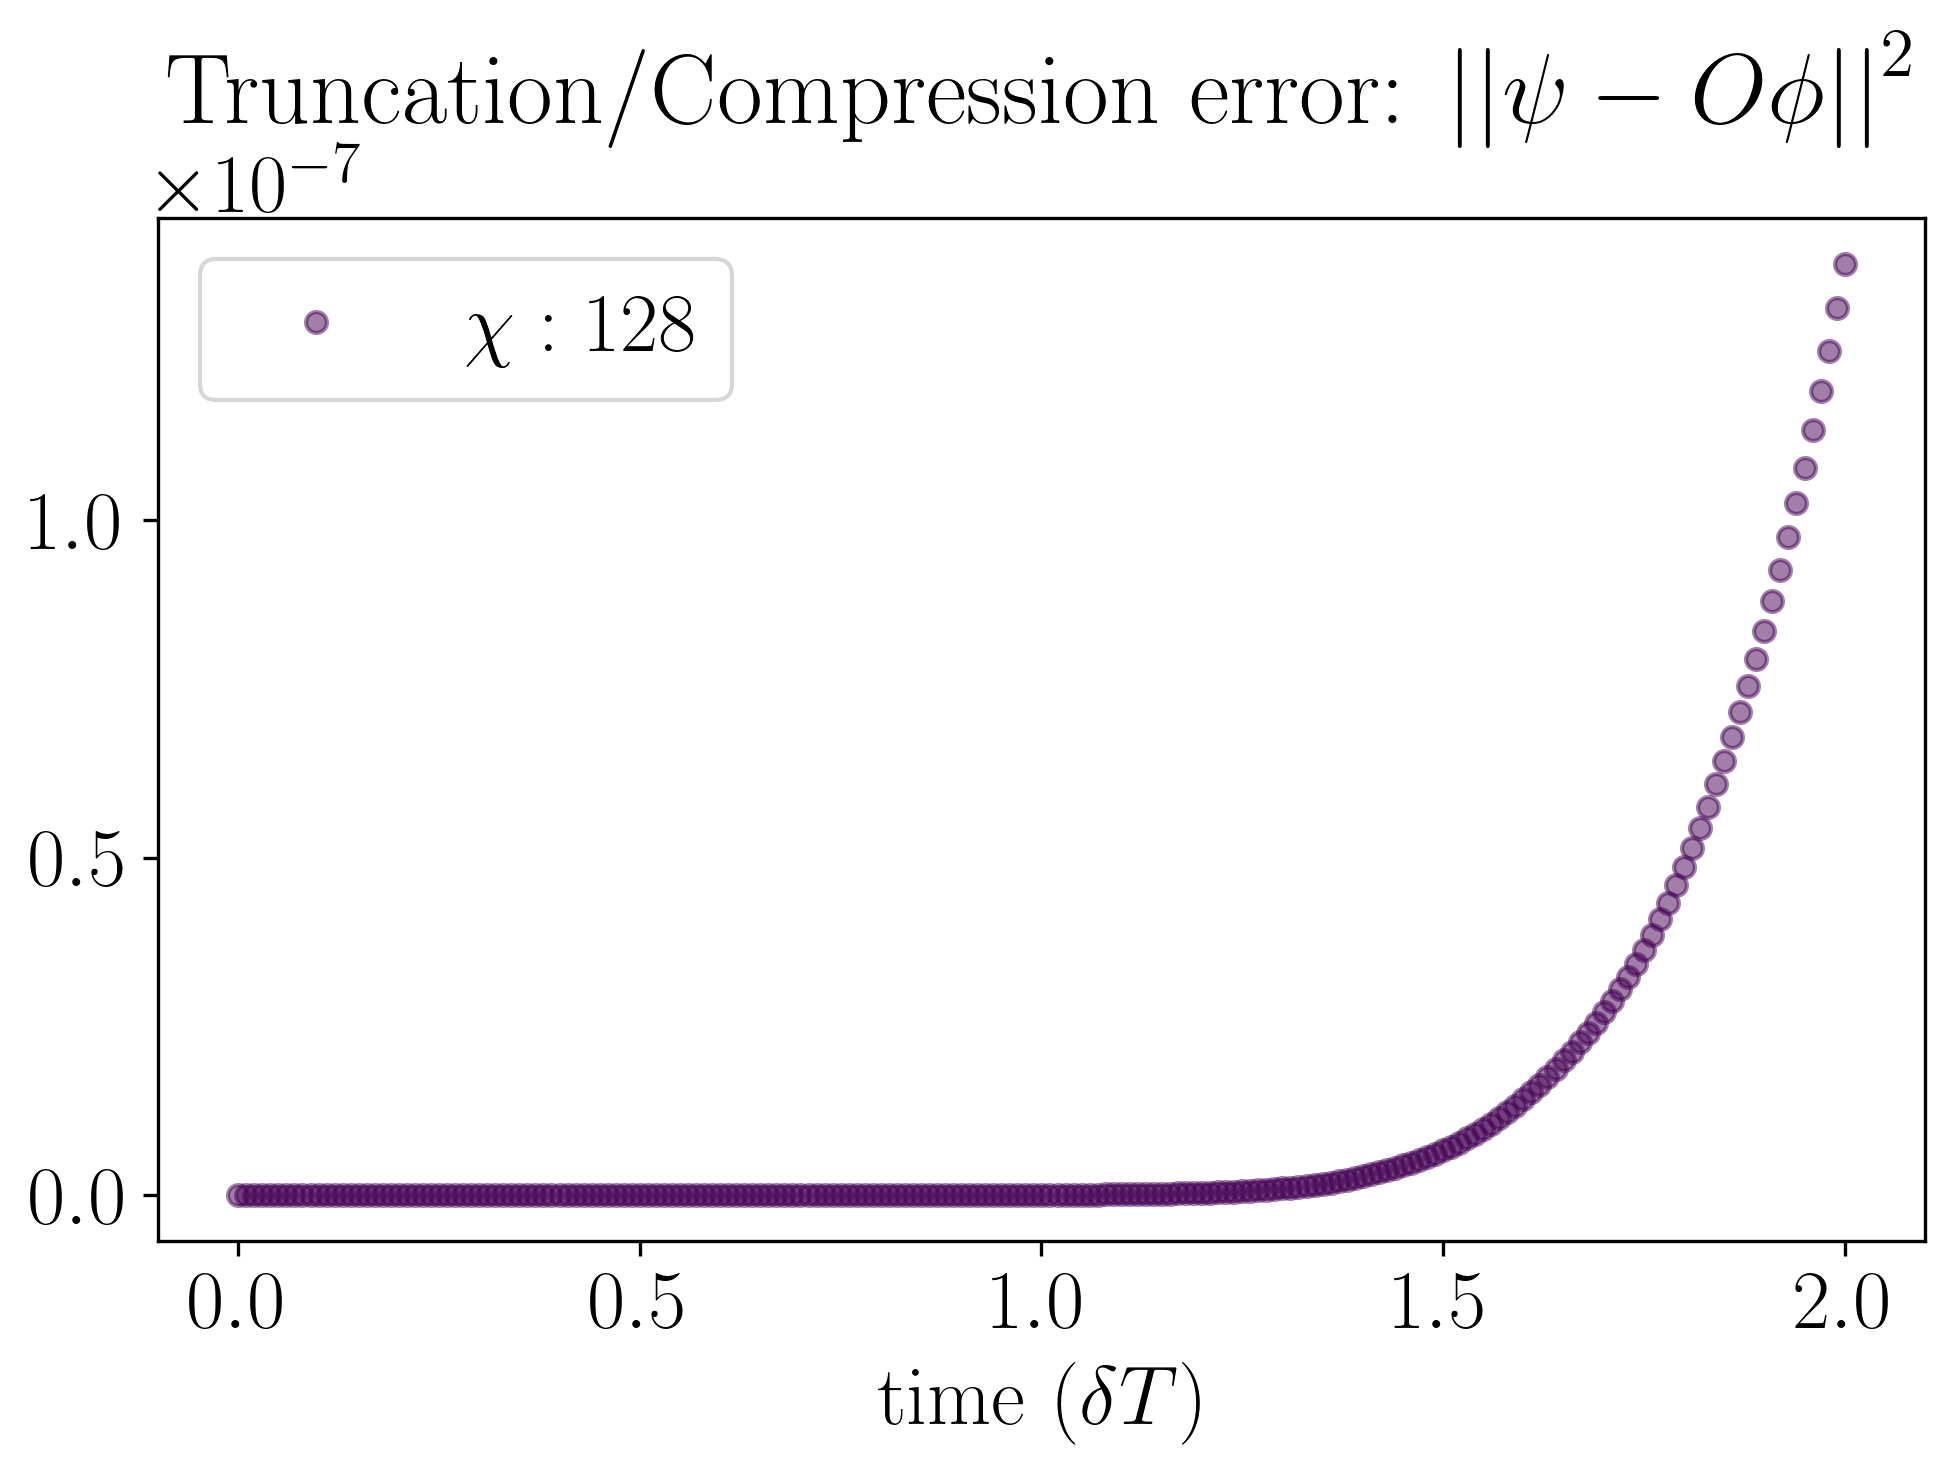

In [690]:
colors = create_sequential_colors(len(chis))
plt.title("Truncation/Compression error: ${||\psi - O \phi||}^2$")
for i, errs in enumerate(trunc_err):
    plt.plot(delta*np.asarray(range(steps+1)), errs, marker='o', linestyle="", markersize=5, alpha=0.5, color=colors[i], label=f"$\chi: {chis[i]}$")
plt.xlabel("time $(\\delta T)$")
plt.legend()

In [691]:
entropies = []
for chi in chis:
    # entr_chi = load_list_of_lists(
    #     f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    entr_chi = np.load(
        f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    entropies.append(entr_chi)

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/1283567240.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(delta*np.asarray(range(steps)), entrs[1:], linestyle="-", linewidth=0.7, markersize=5, alpha=1, color=colors[i], label=f"$\chi: {chis[i]}$")


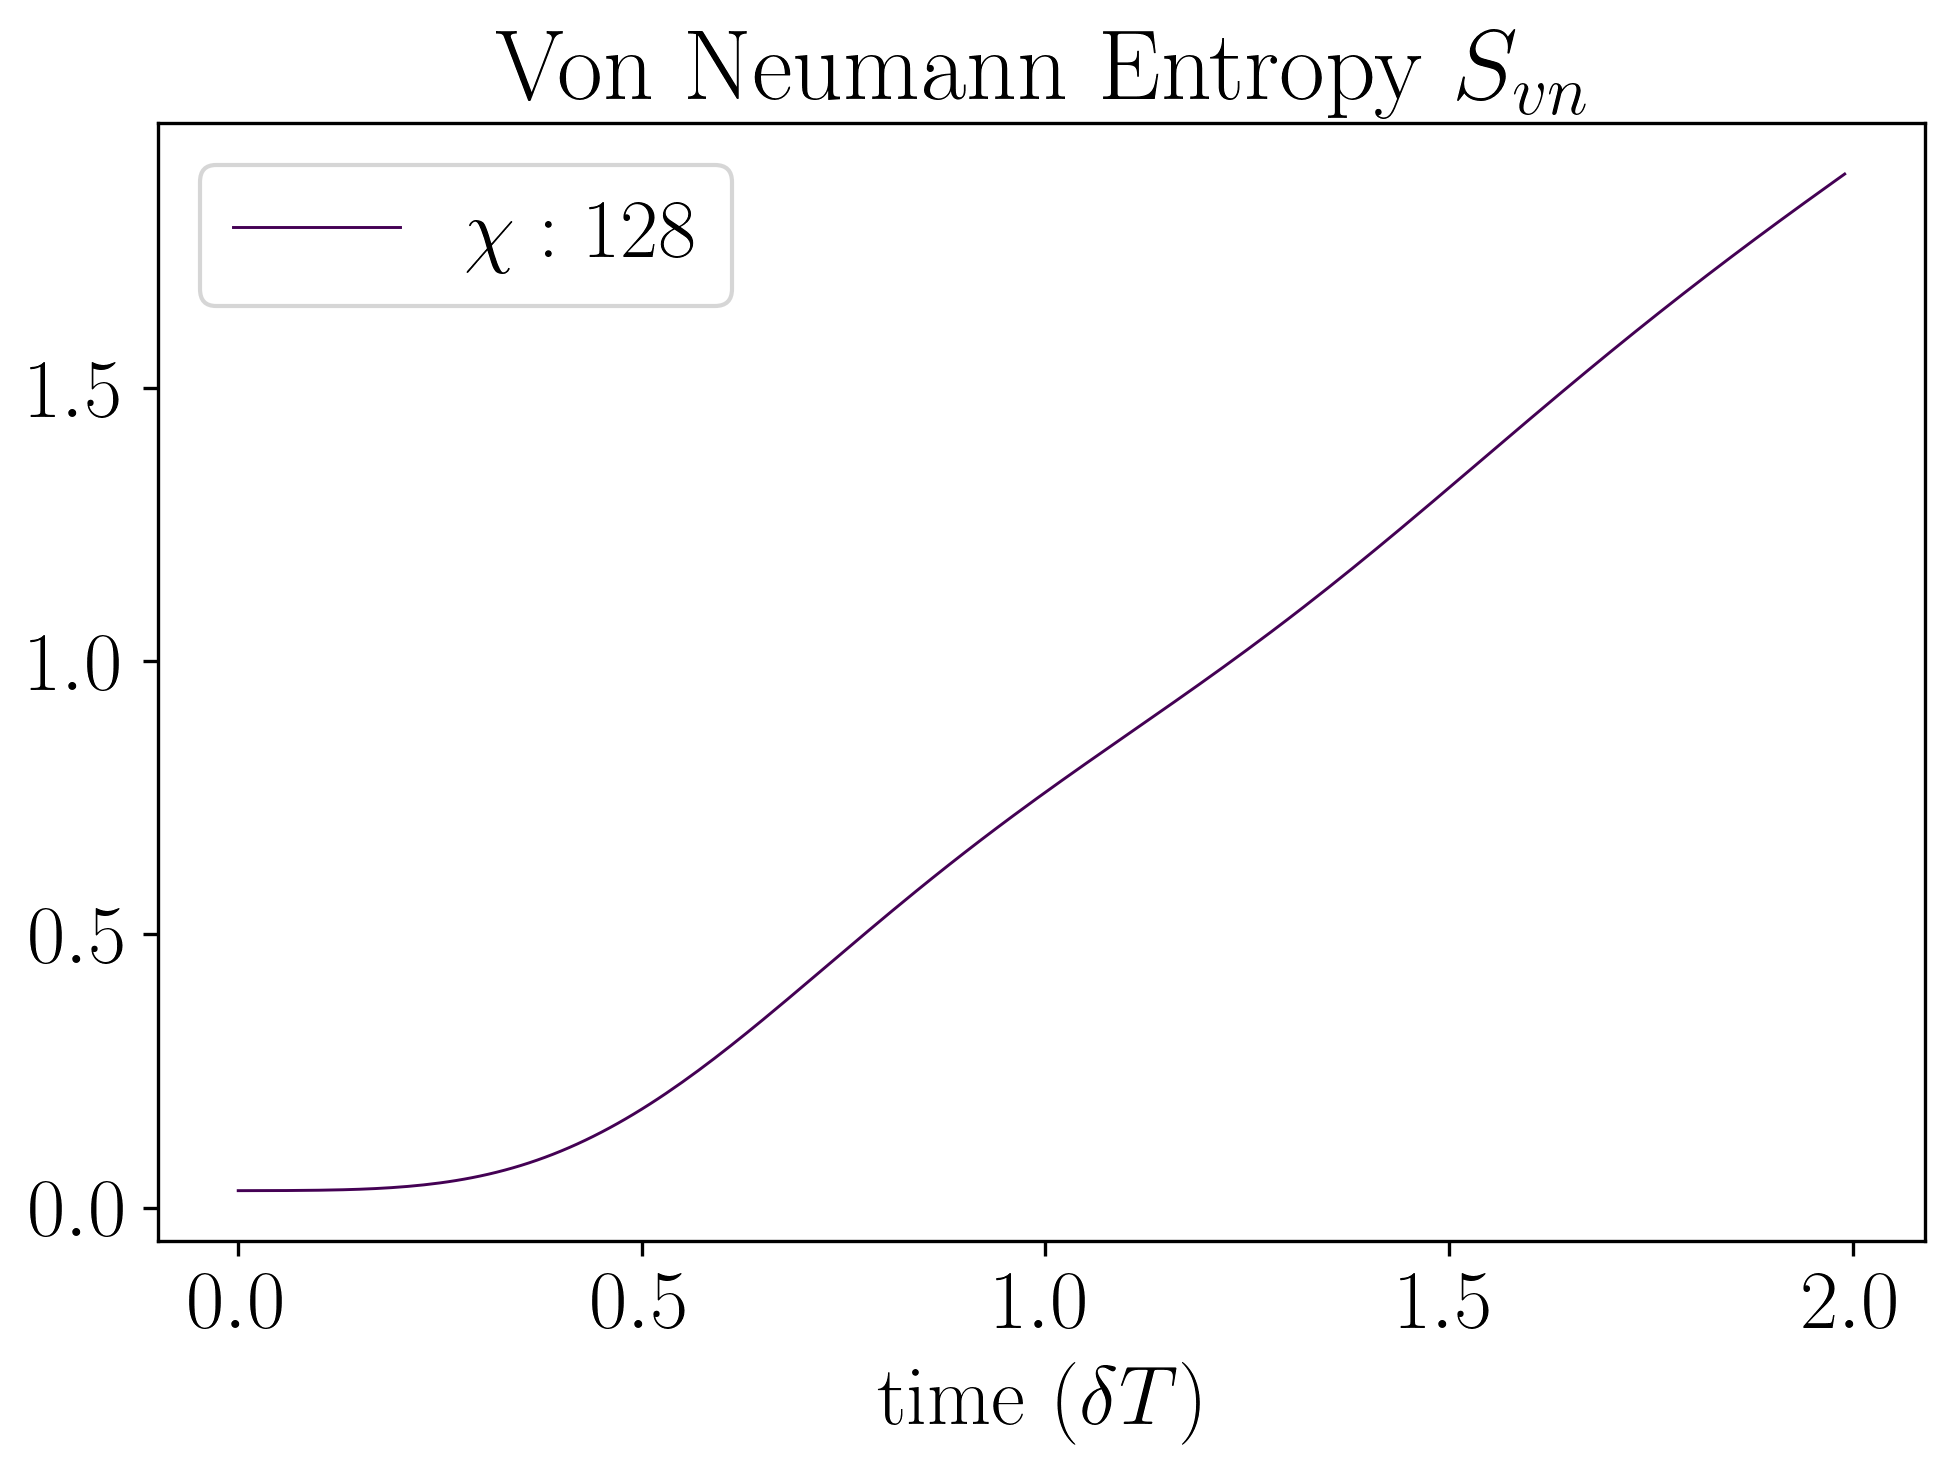

In [692]:
colors = create_sequential_colors(len(chis))
plt.title("Von Neumann Entropy $S_{vn}$")
for i, entrs in enumerate(entropies):
    plt.plot(delta*np.asarray(range(steps)), entrs[1:], linestyle="-", linewidth=0.7, markersize=5, alpha=1, color=colors[i], label=f"$\chi: {chis[i]}$")
plt.xlabel("time $(\\delta T)$")
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/fradm/Desktop/projects/1_Z2/results/entropy_data/15_bond_entropy_quench_dynamics_Z2_dual_direct_lattice_4x30_2_particle(s)_sector_bc_pbc_R_20_h_0.725-0.725_delta_0.01_trotter_steps_200_chi_128.npy'

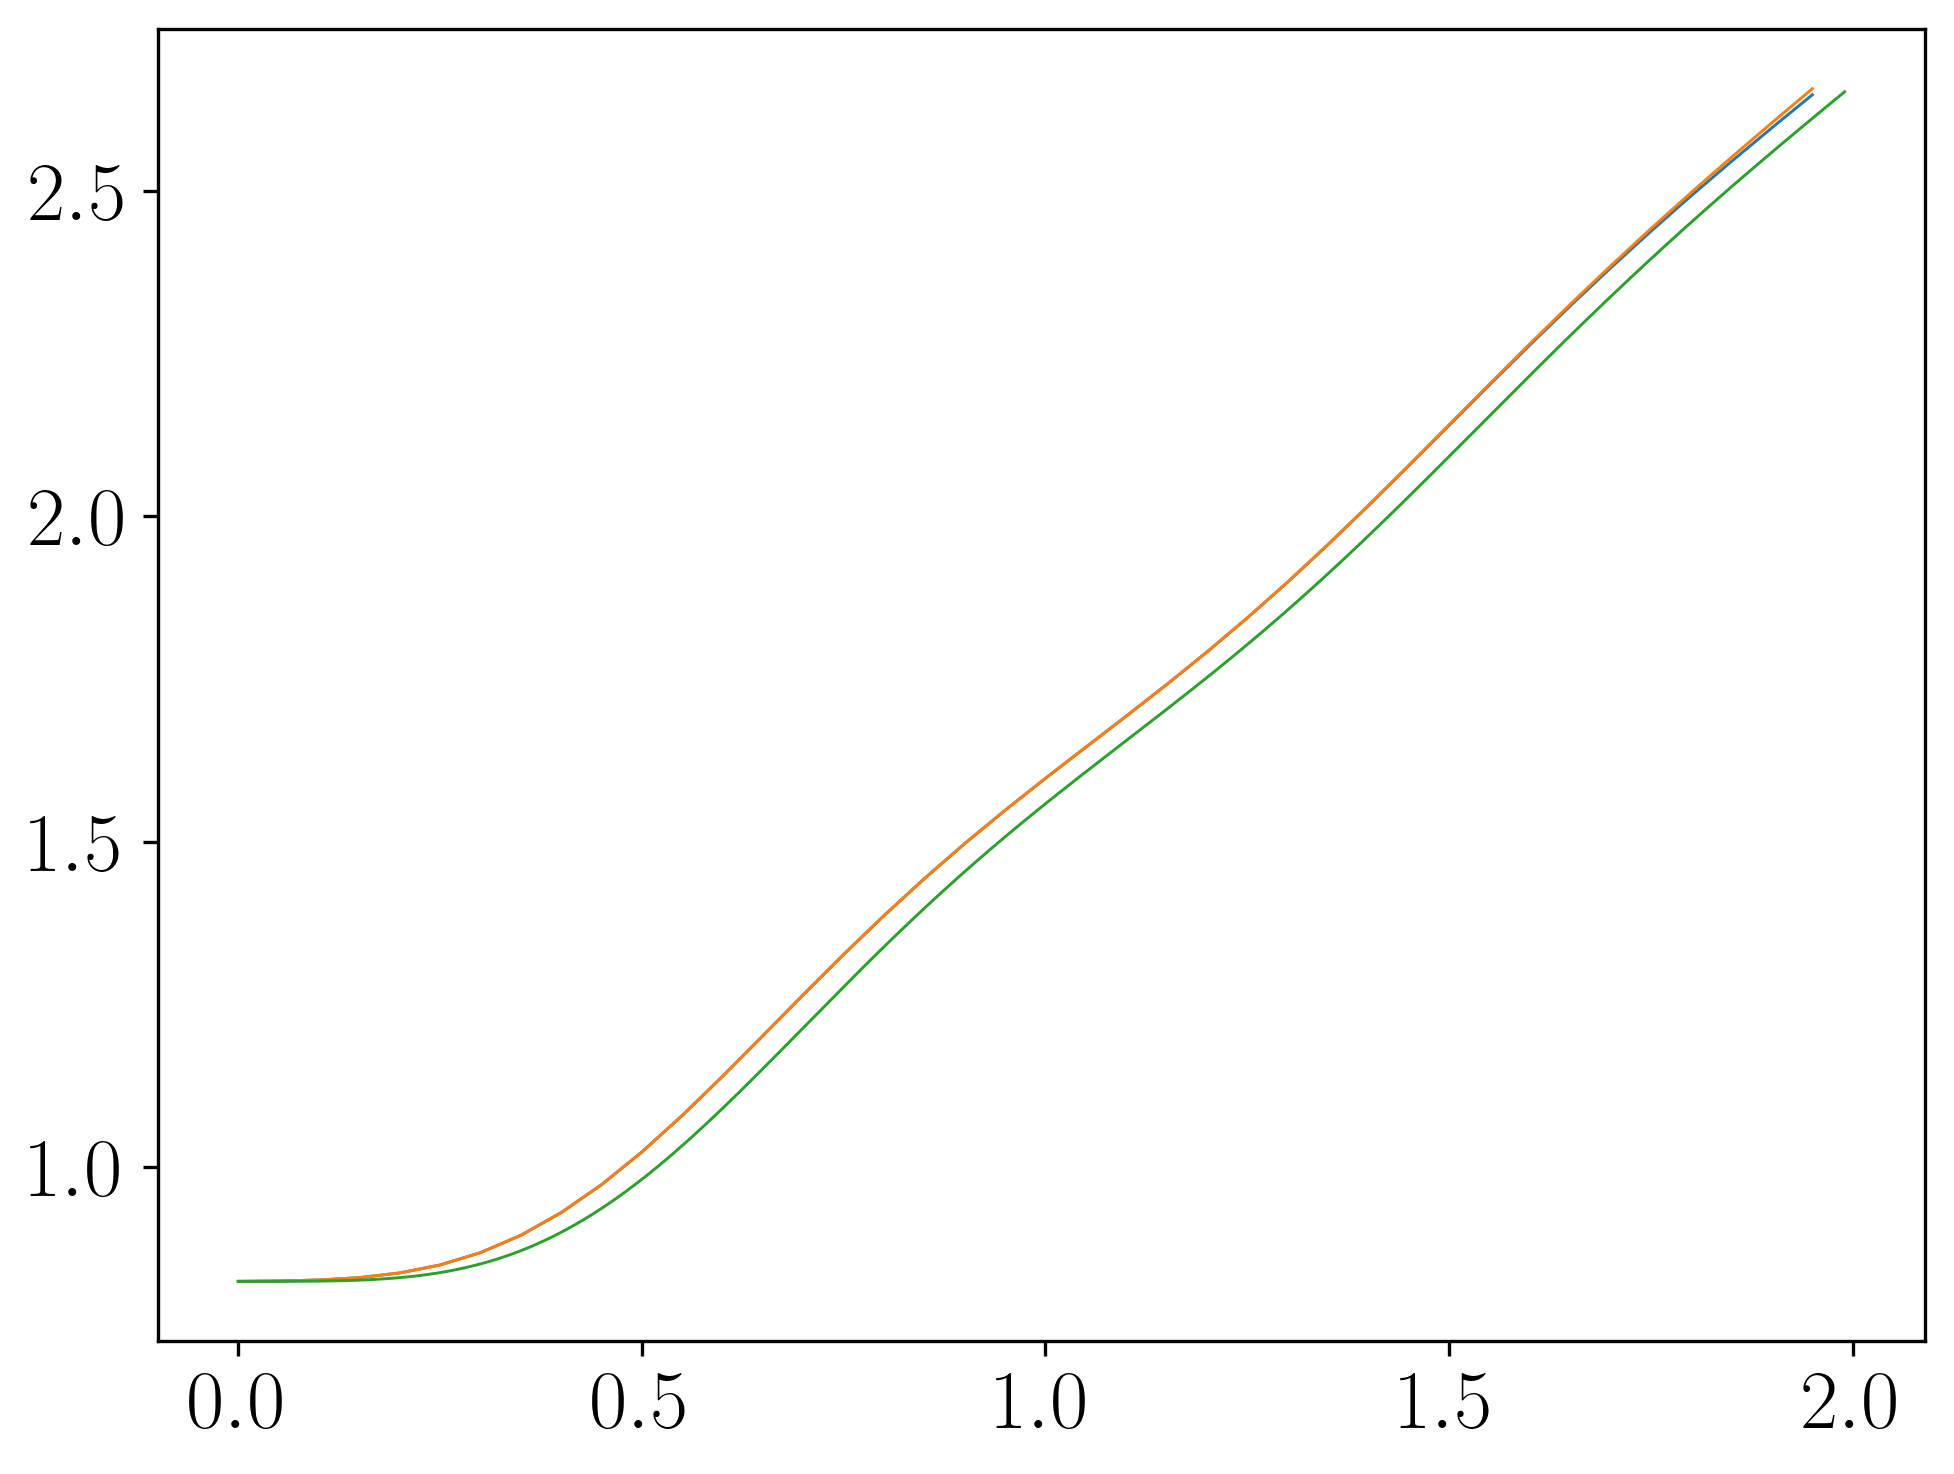

In [ ]:
chis = [64, 128]
deltas = [0.05, 0.01]
trotts = [20, 100, 200]
trotts = [40, 200, 400]
h_i, h_ev = 0.1, 0.1
h_i, h_ev = 0.725, 0.725
# h_i, h_ev = 2.0, 2.0
colors = create_sequential_colors(len(deltas))

for i, delta in enumerate(deltas):
    entropies = []
    label = f"$\\delta: {delta}$ $\\chi: {chis[-1]}$"
    for j, chi in enumerate(chis):
        # entr_chi = load_list_of_lists(
        #     f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
        entr_chi = np.load(
            f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{trotts[i]}_chi_{chi}.npy")
        plt.plot(delta*np.asarray(range(trotts[i])), entr_chi[1:], linestyle="-", linewidth=0.7, markersize=5, color=colors[i], alpha=0.2*(j+1), label=label if chi == chis[-1] else None)
    # plt.legend().get_texts()[0].set_text(f"$g: {h_ev}$ $\chi: {chi}$")

plt.title("Entropy evolution for different $\\delta$")
plt.xlabel("time $(\\delta T)$")
# plt.yscale("log")
plt.legend()

<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/524126901.py:9: SyntaxWarning: invalid escape sequence '\c'
  label = f"$g: {h_ev}$ $\chi: {chis[-1]}$"


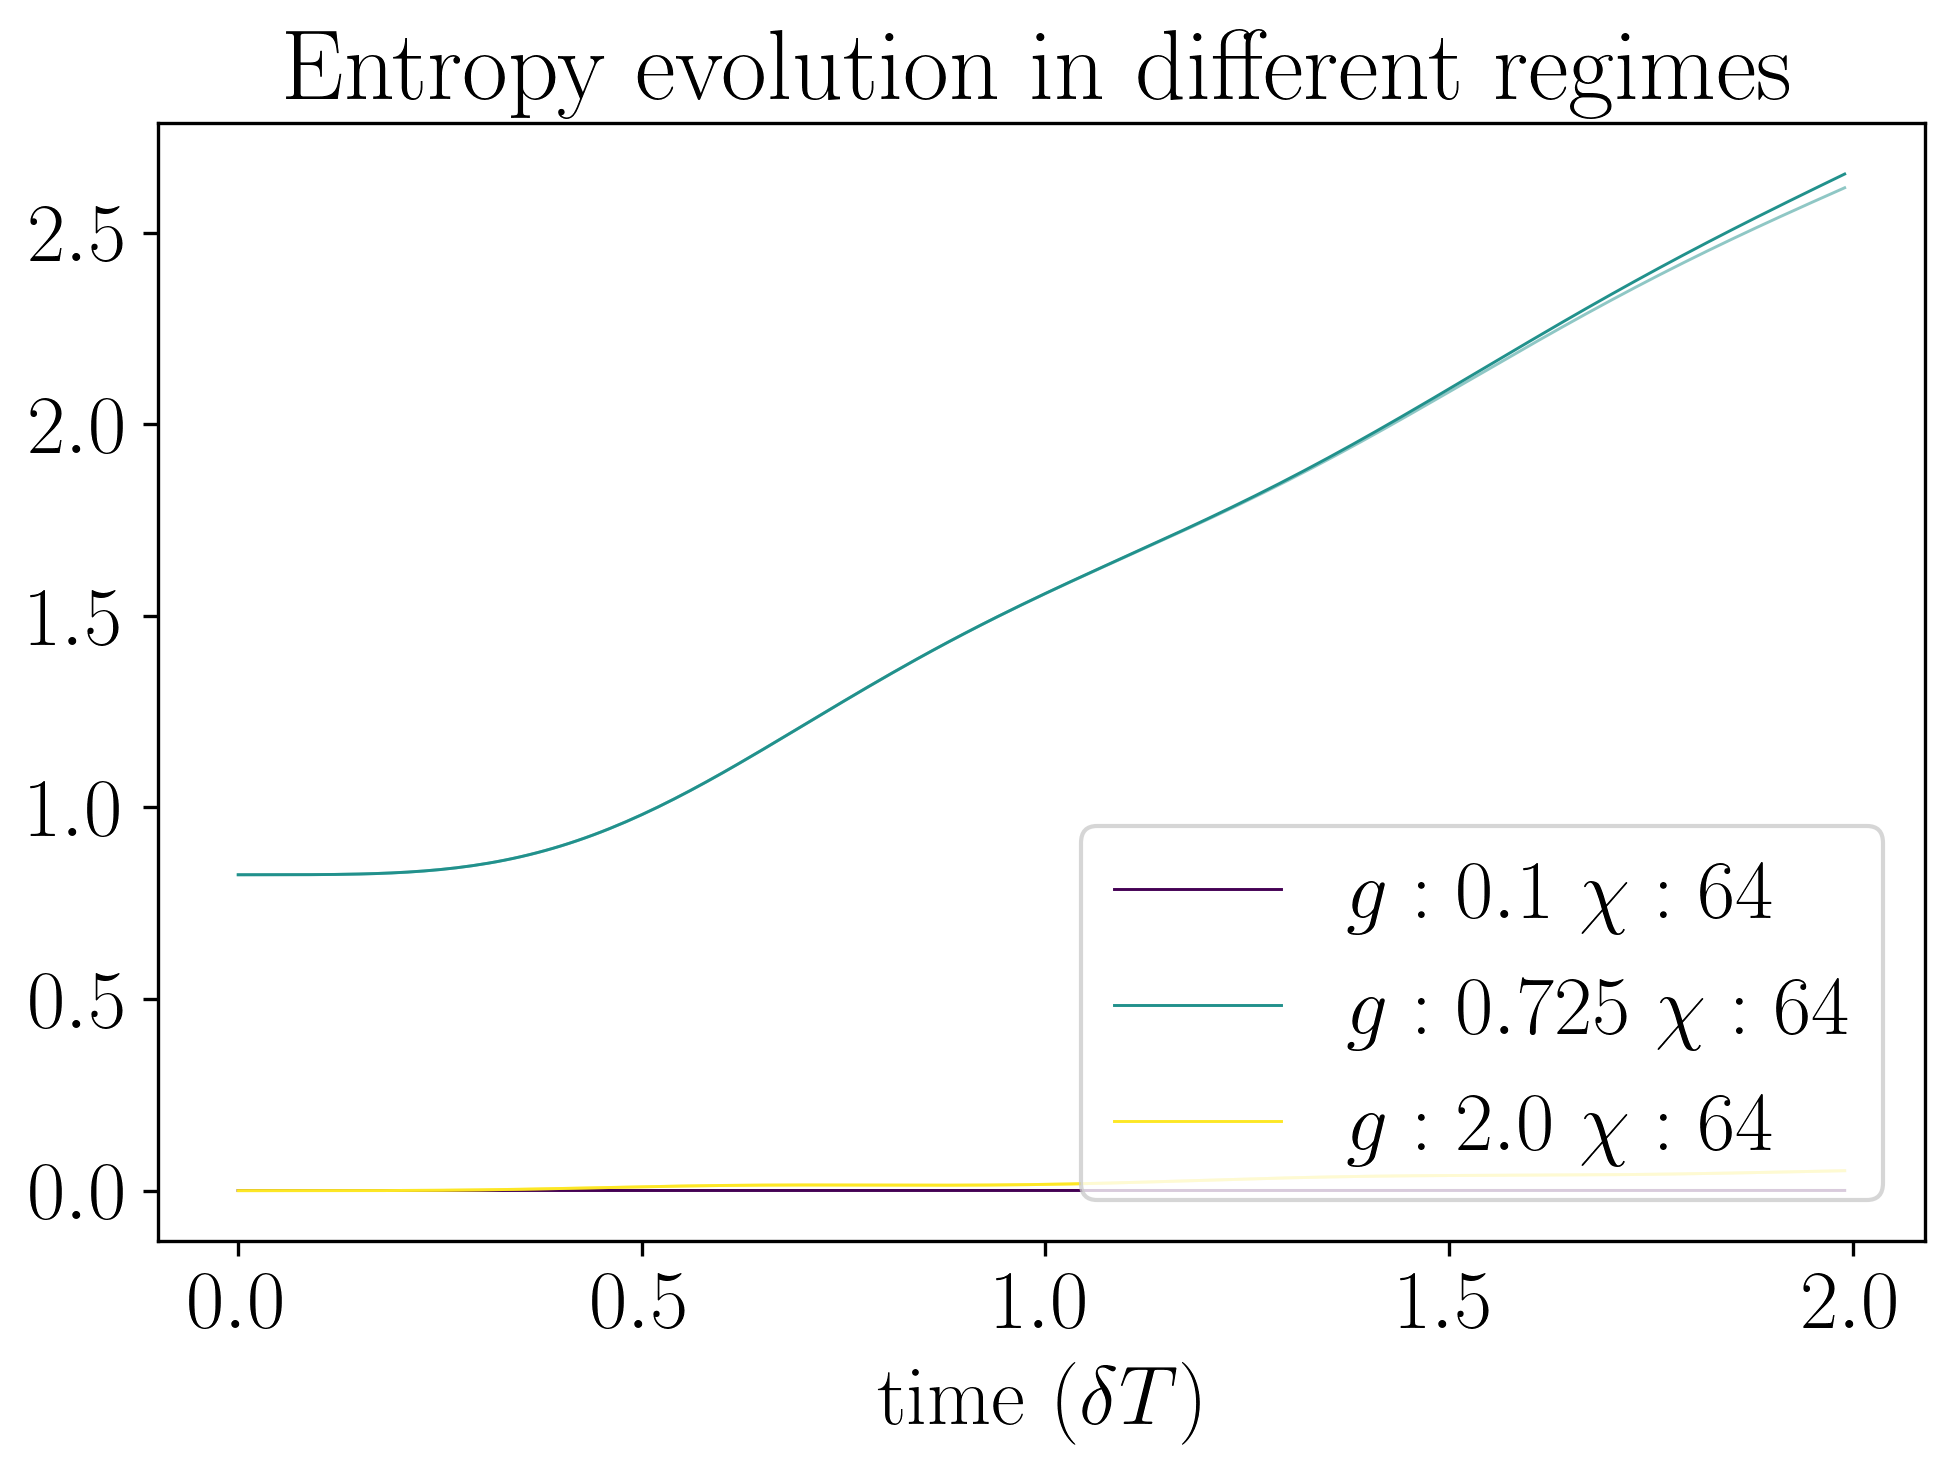

In [654]:
chis = [32, 64]
h_evs = [0.1, 0.725, 2.0]
delta, steps = 0.01, 200
colors = create_sequential_colors(len(h_evs))

for i, h_ev in enumerate(h_evs):
    h_i = h_ev
    entropies = []
    label = f"$g: {h_ev}$ $\chi: {chis[-1]}$"
    for j, chi in enumerate(chis):
        # entr_chi = load_list_of_lists(
        #     f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
        entr_chi = np.load(
            f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
        plt.plot(delta*np.asarray(range(steps)), entr_chi[1:], linestyle="-", linewidth=0.7, markersize=5, color=colors[i], alpha=0.5*(j+1), label=label if chi == chis[-1] else None)
    # plt.legend().get_texts()[0].set_text(f"$g: {h_ev}$ $\chi: {chi}$")

plt.title("Entropy evolution in different regimes")
plt.xlabel("time $(\\delta T)$")
# plt.yscale("log")
plt.legend(loc="lower right")

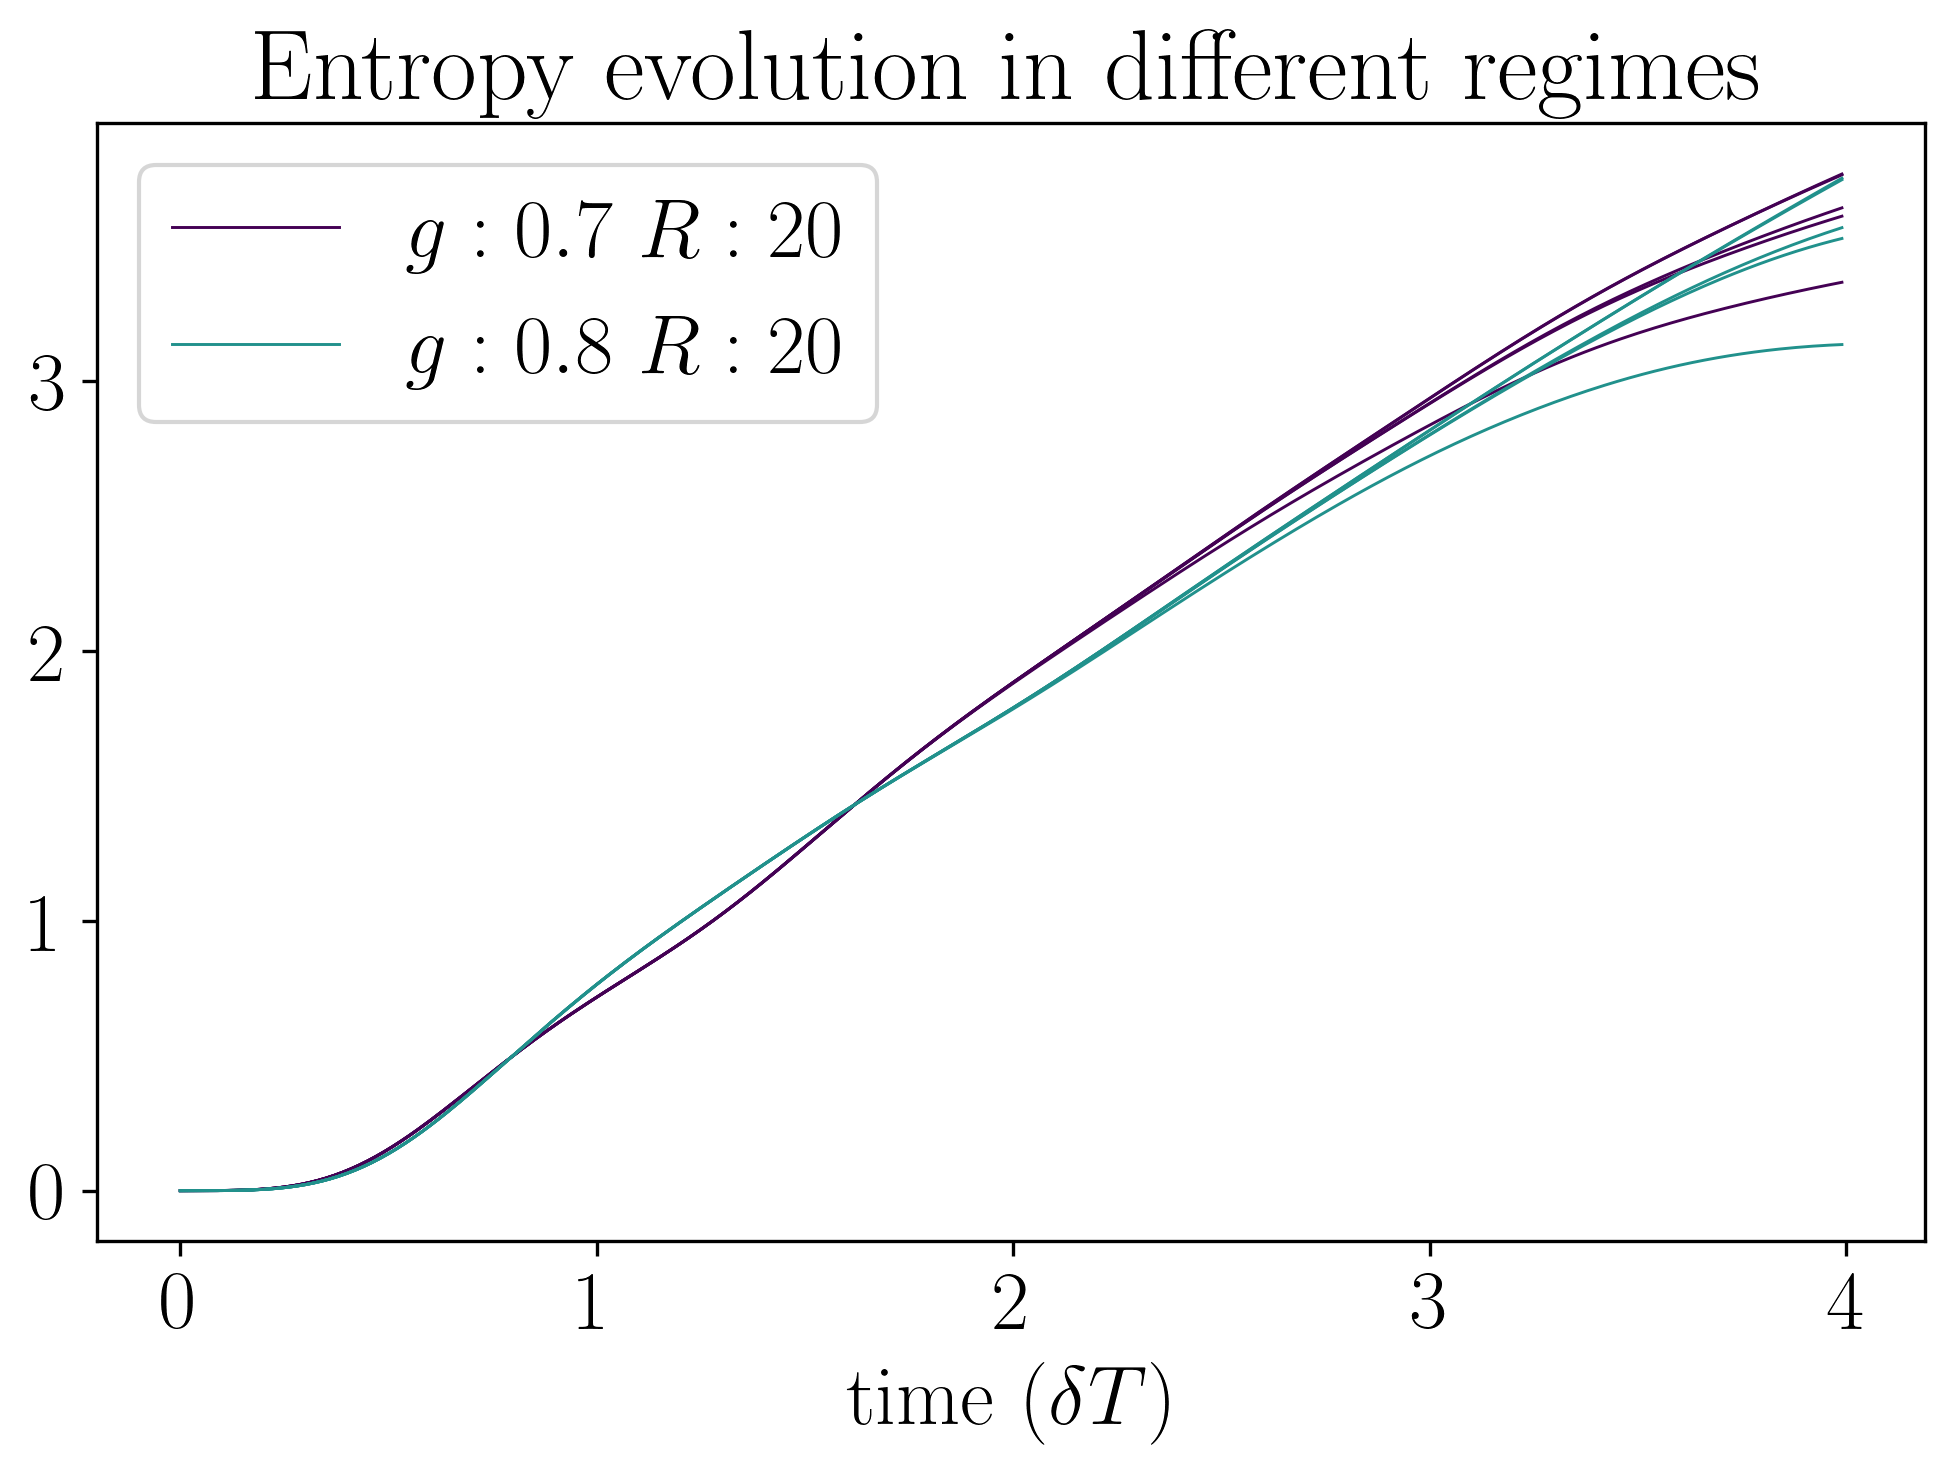

In [95]:
chi = 64
Rs = [10,11,12,15,20]
h_evs = [0.7,0.8]
delta, steps = 0.01, 400
colors = create_sequential_colors(colormap_name="viridis", num_colors=len(h_evs)+1)
# colors = create_sequential_colors(len(Rs))

for i, h_ev in enumerate(h_evs):
    h_i = h_ev
    entropies = []
    label = f"$g: {h_ev}$ $R: {Rs[-1]}$"
    # label = None
    for j, R in enumerate(Rs):
        # entr_chi = load_list_of_lists(
        #     f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
        entr_chi = np.load(
            f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
        plt.plot(delta*np.asarray(range(steps)), entr_chi[1:]-entr_chi[1], linestyle="-", linewidth=0.7, markersize=5, color=colors[i], label=label if R == Rs[-1] else None)
        entropies.append(entr_chi[1:]-entr_chi[1])

plt.title("Entropy evolution in different regimes")
plt.xlabel("time $(\\delta T)$")
# plt.yscale("log")
plt.legend()

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_31100/3473231436.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(delta*np.asarray(range(steps)), (entropies[-1] - entropies[i]), linestyle="-", linewidth=0.7, markersize=5, color=colors[i], label=f"$\Delta R: {Rs[-1]} - {Rs[i]}$")


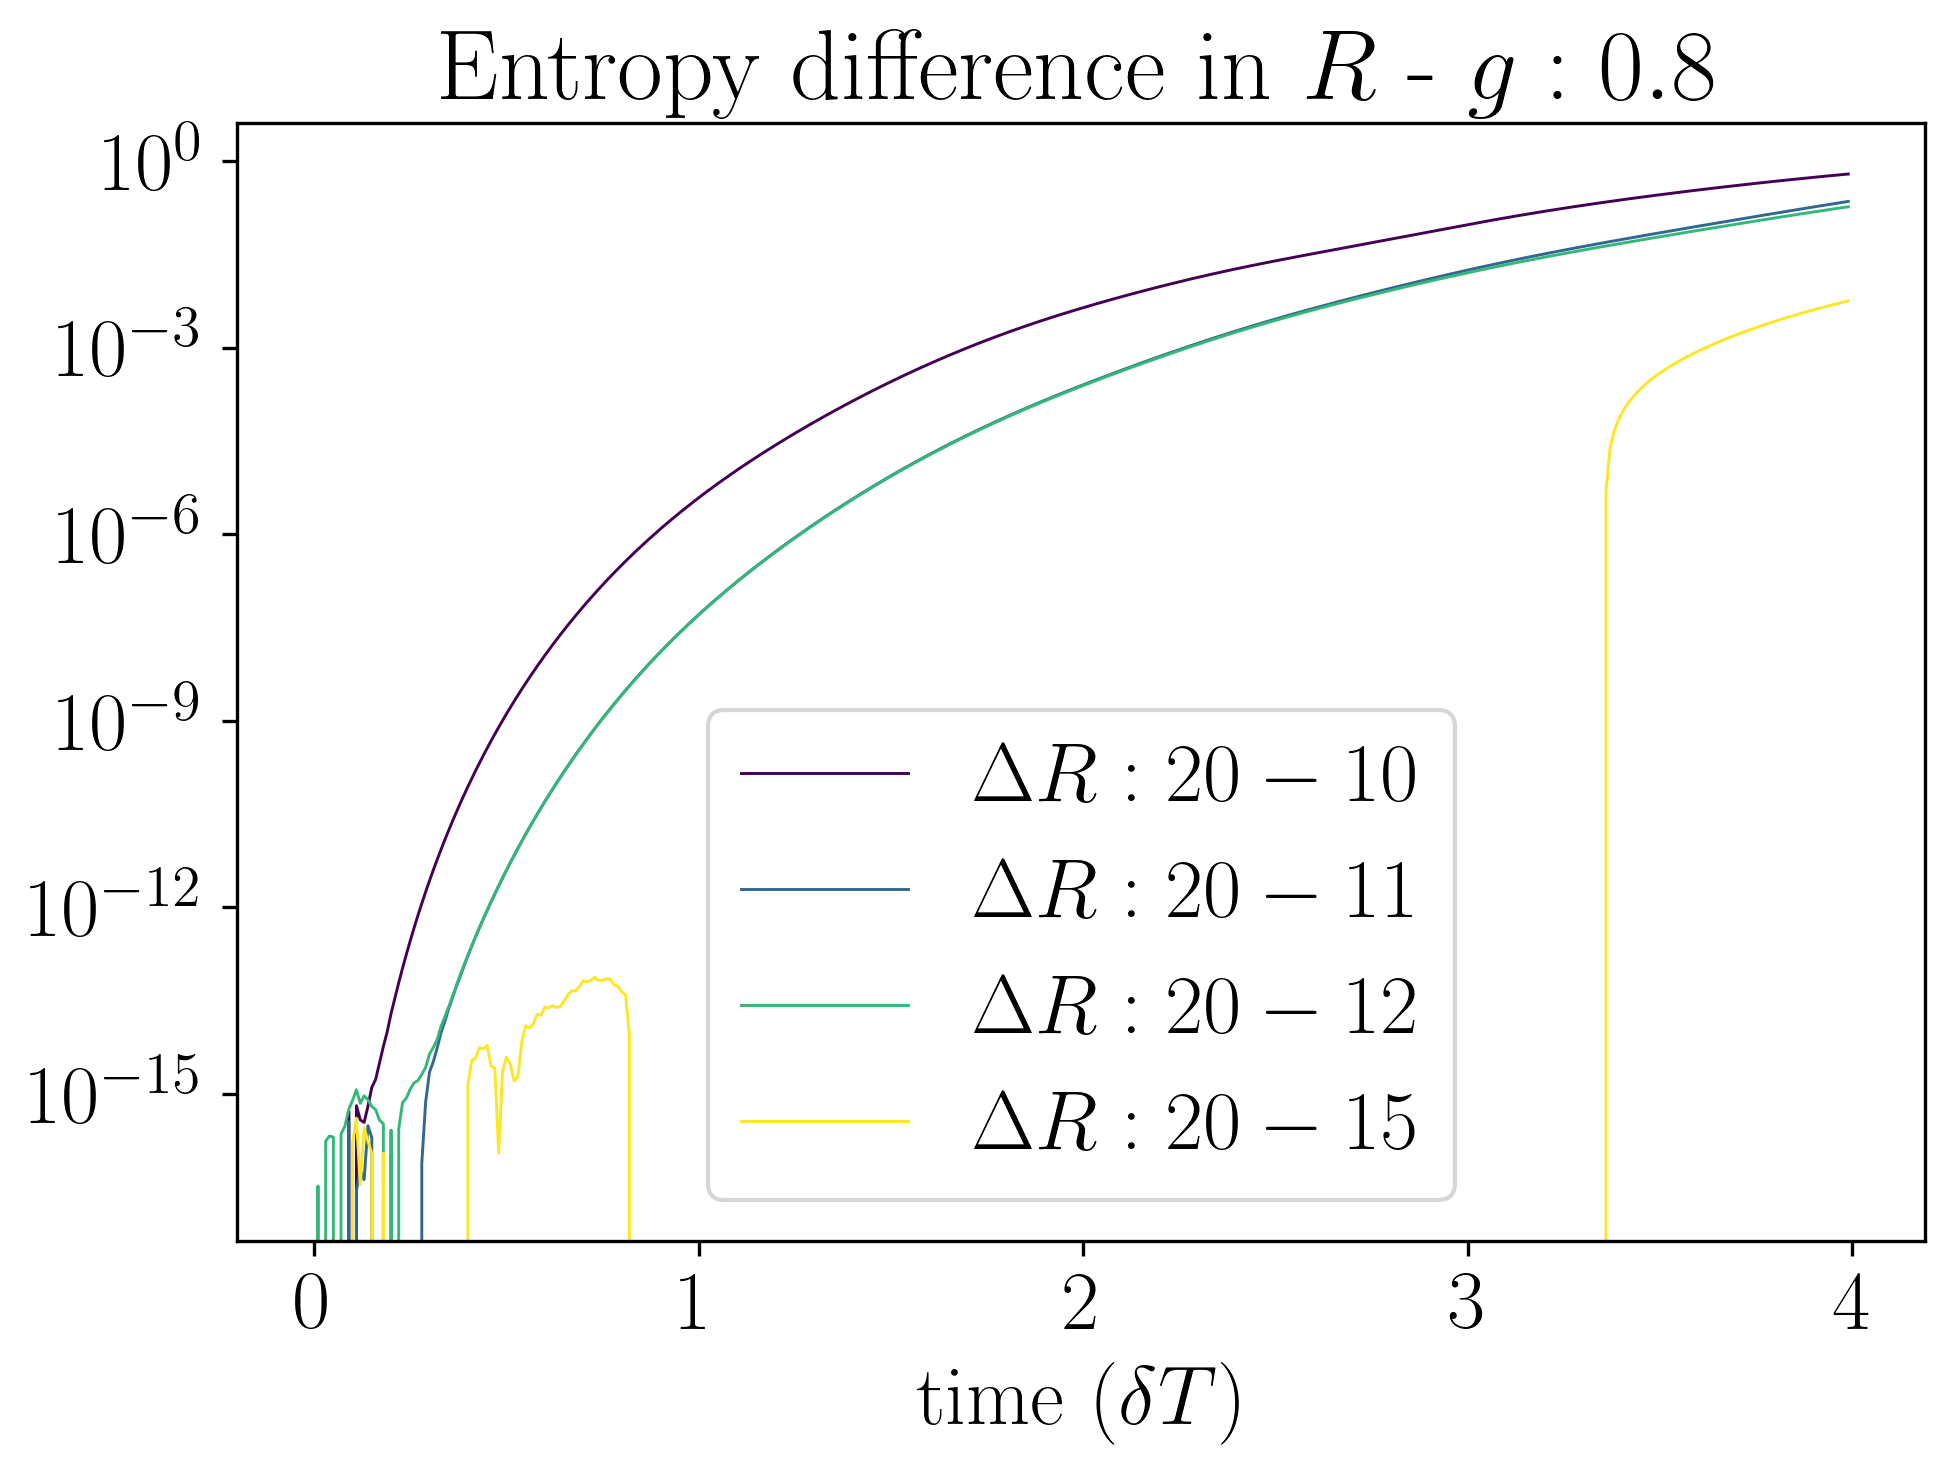

In [91]:
colors = create_sequential_colors(len(Rs)-1)

for i in range(len(entropies)-1):    
    plt.plot(delta*np.asarray(range(steps)), (entropies[-1] - entropies[i]), linestyle="-", linewidth=0.7, markersize=5, color=colors[i], label=f"$\Delta R: {Rs[-1]} - {Rs[i]}$")
    # plt.legend().get_texts()[0].set_text(f"$g: {h_ev}$ $\chi: {chi}$")

plt.title(f"Entropy difference in $R$ - $g: {h_ev}$")
plt.xlabel("time $(\\delta T)$")
plt.yscale("log")
plt.legend()

<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/867062452.py:10: SyntaxWarning: invalid escape sequence '\c'
  label = f"$l: {l}$ $\chi: {chi}$"


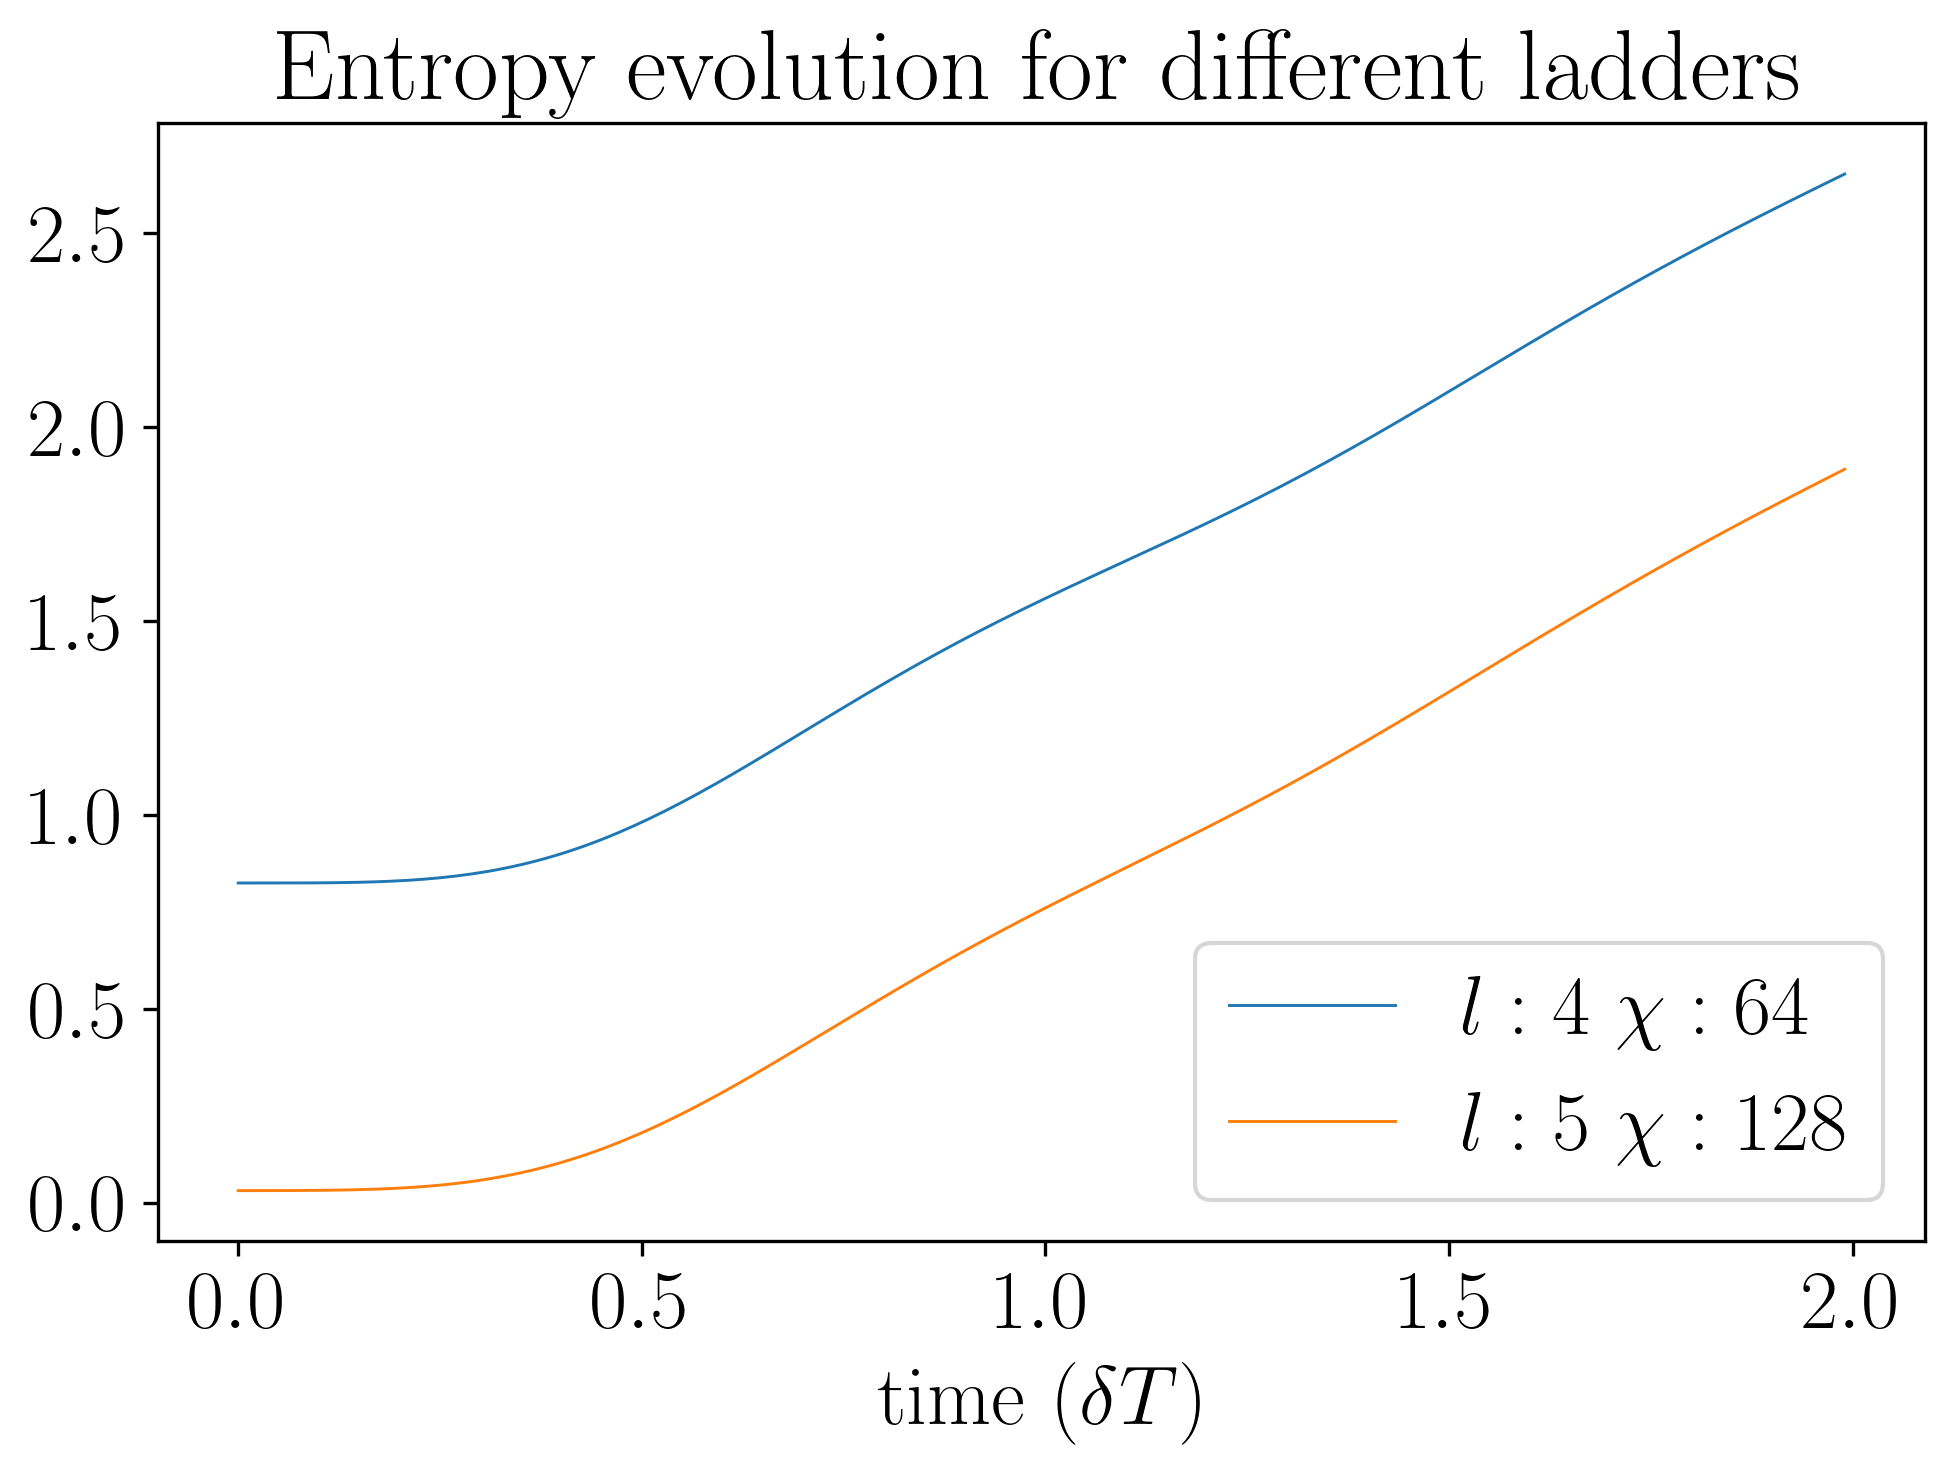

In [735]:
chis = [64,128]
ls = [4,5]
h_ev = 0.725
delta, steps = 0.01, 200
colors = create_sequential_colors(len(ls))

for l, chi in zip(ls, chis):
    h_i = h_ev
    entropies = []
    label = f"$l: {l}$ $\chi: {chi}$"
        # entr_chi = load_list_of_lists(
        #     f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    entr_chi = np.load(
        f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    plt.plot(delta*np.asarray(range(steps)), entr_chi[1:], linestyle="-", linewidth=0.7, markersize=5, label=label)
    # plt.legend().get_texts()[0].set_text(f"$g: {h_ev}$ $\chi: {chi}$")

plt.title("Entropy evolution for different ladders")
plt.xlabel("time $(\\delta T)$")
# plt.yscale("log")
plt.legend(loc="lower right")

In [ ]:
smvals = []
for chi in chis:
    # sv_chi = load_list_of_lists(
    #     f"{path_tensor}/results/entropy_data/{L//2}_schmidt_vals_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    sv_chi = load_list_of_lists(
        f"{path_tensor}/results/entropy_data/{where}_schmidt_vals_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    print(len(sv_chi), len(sv_chi[0]))
    smvals.append(sv_chi)
smvals.reverse()
chis.reverse()

In [ ]:
colors = create_sequential_colors(len(chis))
index = -1
plt.title(f"Schmidt values decay - $t: {delta*(range(steps)[index]+1)}$")
for i, sv in enumerate(smvals):
    plt.plot(sv[index], marker='o', linestyle="-", markersize=5, alpha=1, color=colors[i], label=f"$\chi: {chis[i]}$")
plt.xlabel("schmidt values")
plt.yscale("log")
plt.legend()

<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/4031594994.py:8: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(delta*np.asarray(range(steps)), arr, marker='o', linestyle="-", markersize=5, alpha=1, color=colors[i], label=f"$\chi: {chis[i]}$")


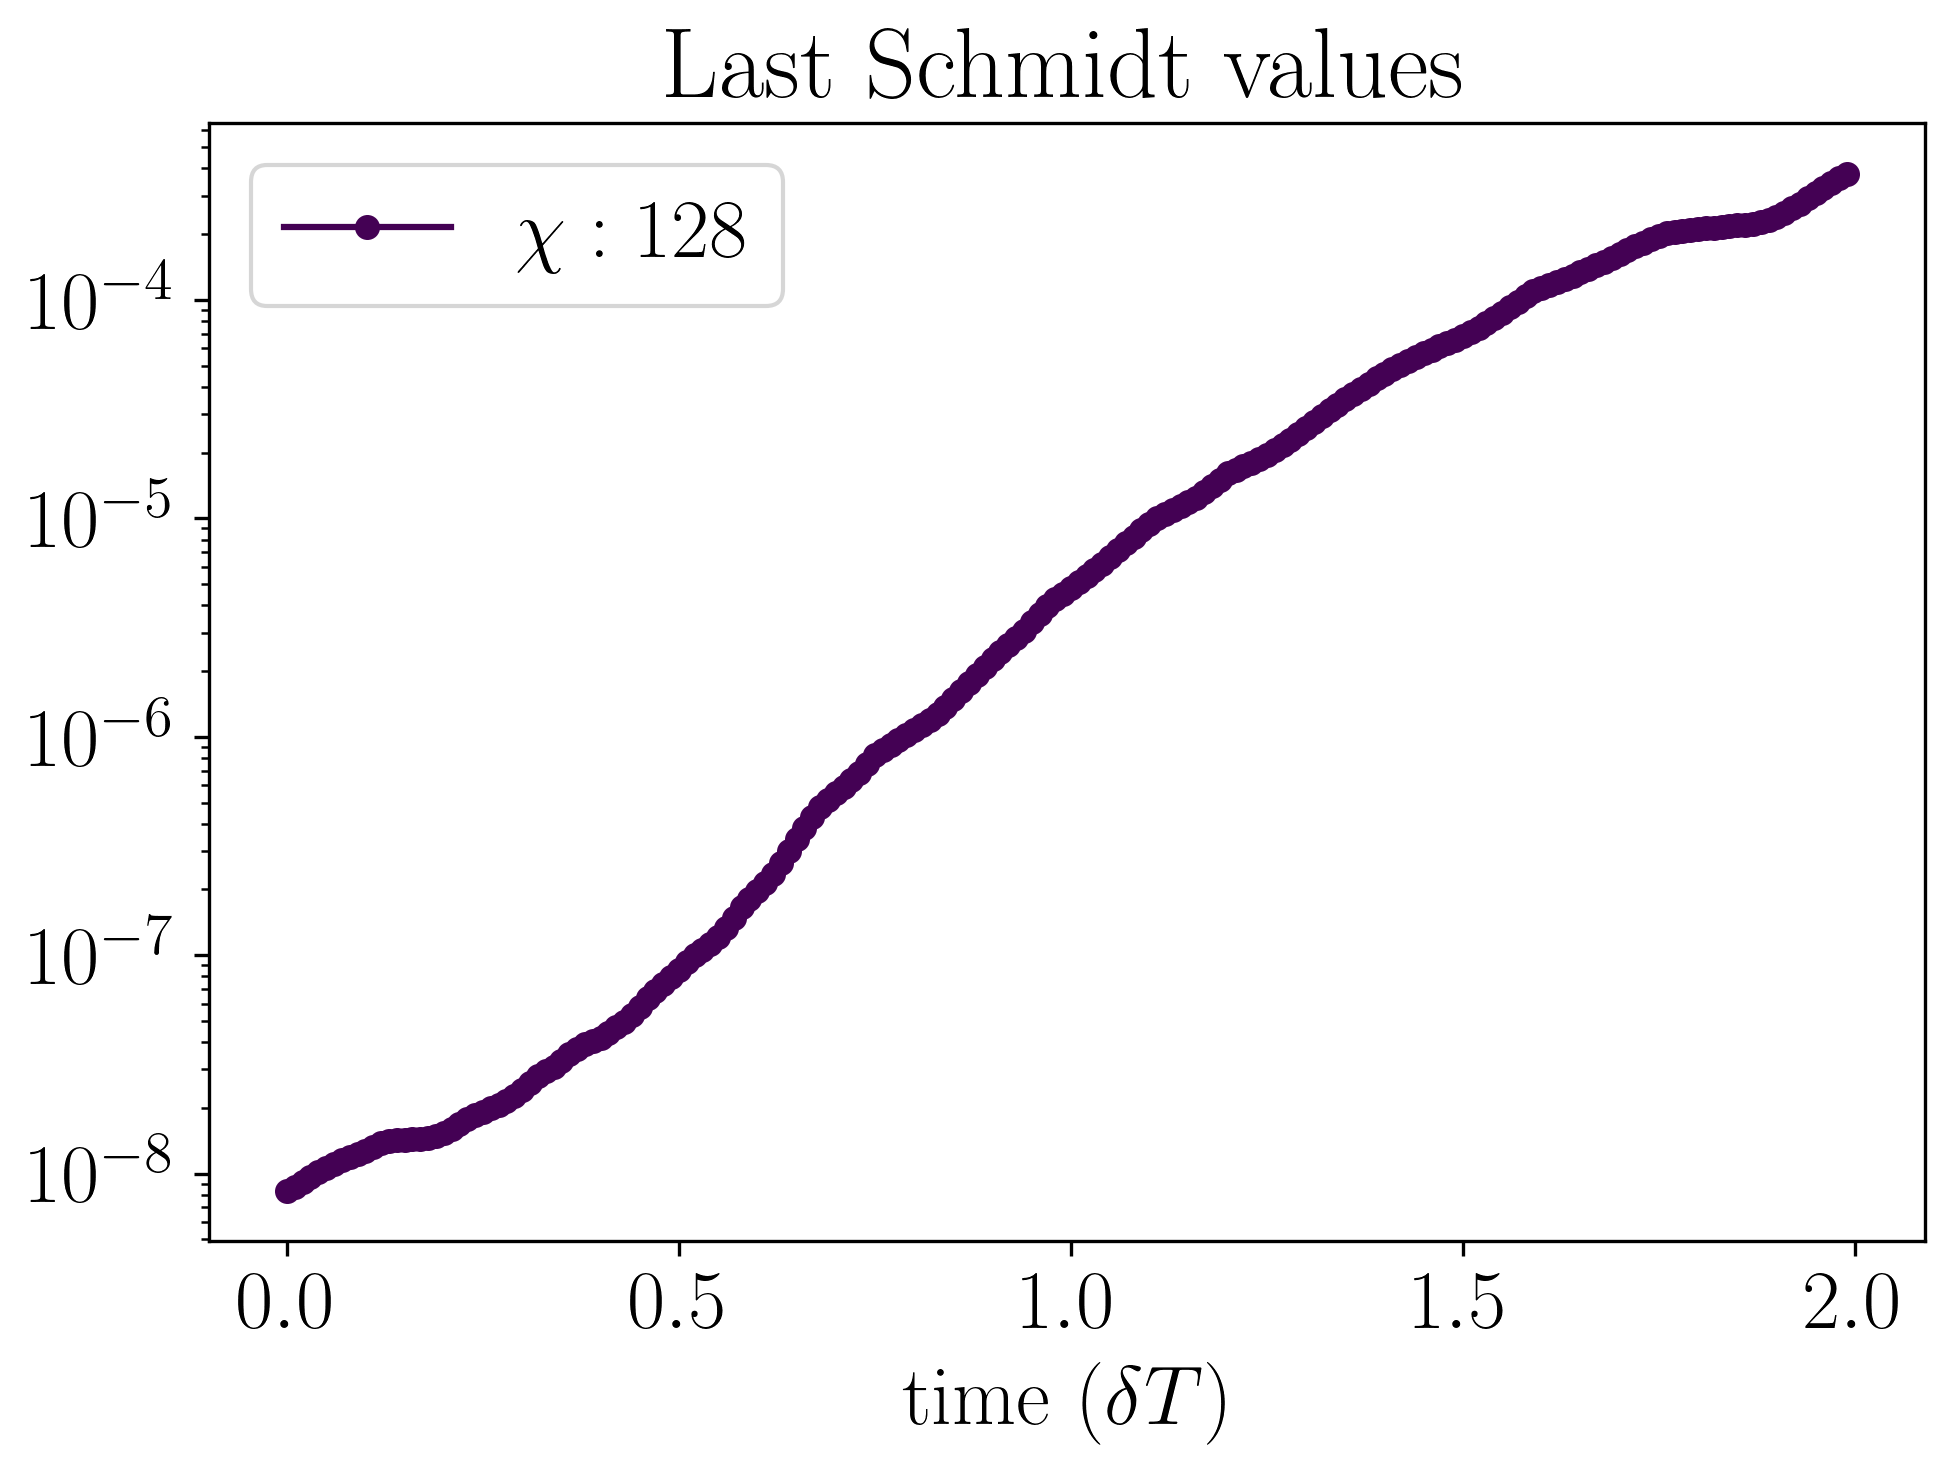

In [698]:
colors = create_sequential_colors(len(chis))
index = -1
plt.title(f"Last Schmidt values")
for i, sv in enumerate(smvals):
    arr = []
    for val in sv:
        arr.append(val[-1])
    plt.plot(delta*np.asarray(range(steps)), arr, marker='o', linestyle="-", markersize=5, alpha=1, color=colors[i], label=f"$\chi: {chis[i]}$")
plt.xlabel("time $(\\delta T)$")
plt.yscale("log")
plt.legend()

In [27]:
chis.reverse()

In [700]:
losch = []
for chi in chis:
    losch_chi = np.load(
        f"{path_tensor}/results/overlap/loschmidt_amplitudes_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    losch.append(losch_chi)

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/12930034.py:2: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Loschmidt Echo $\mathcal{L}(t)$")
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/12930034.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(delta*np.asarray(range(steps+1)), [ov*ov.conjugate() for ov in losch_amp], linestyle="-", markersize=5, alpha=0.8, color=colors[i], label=f"$\mathcal{{L}}(t)$ $\chi: {chis[i]}$")
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/12930034.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(delta*np.asarray(range(steps+1)), [ov*ov.conjugate() for ov in losch_amp], lines

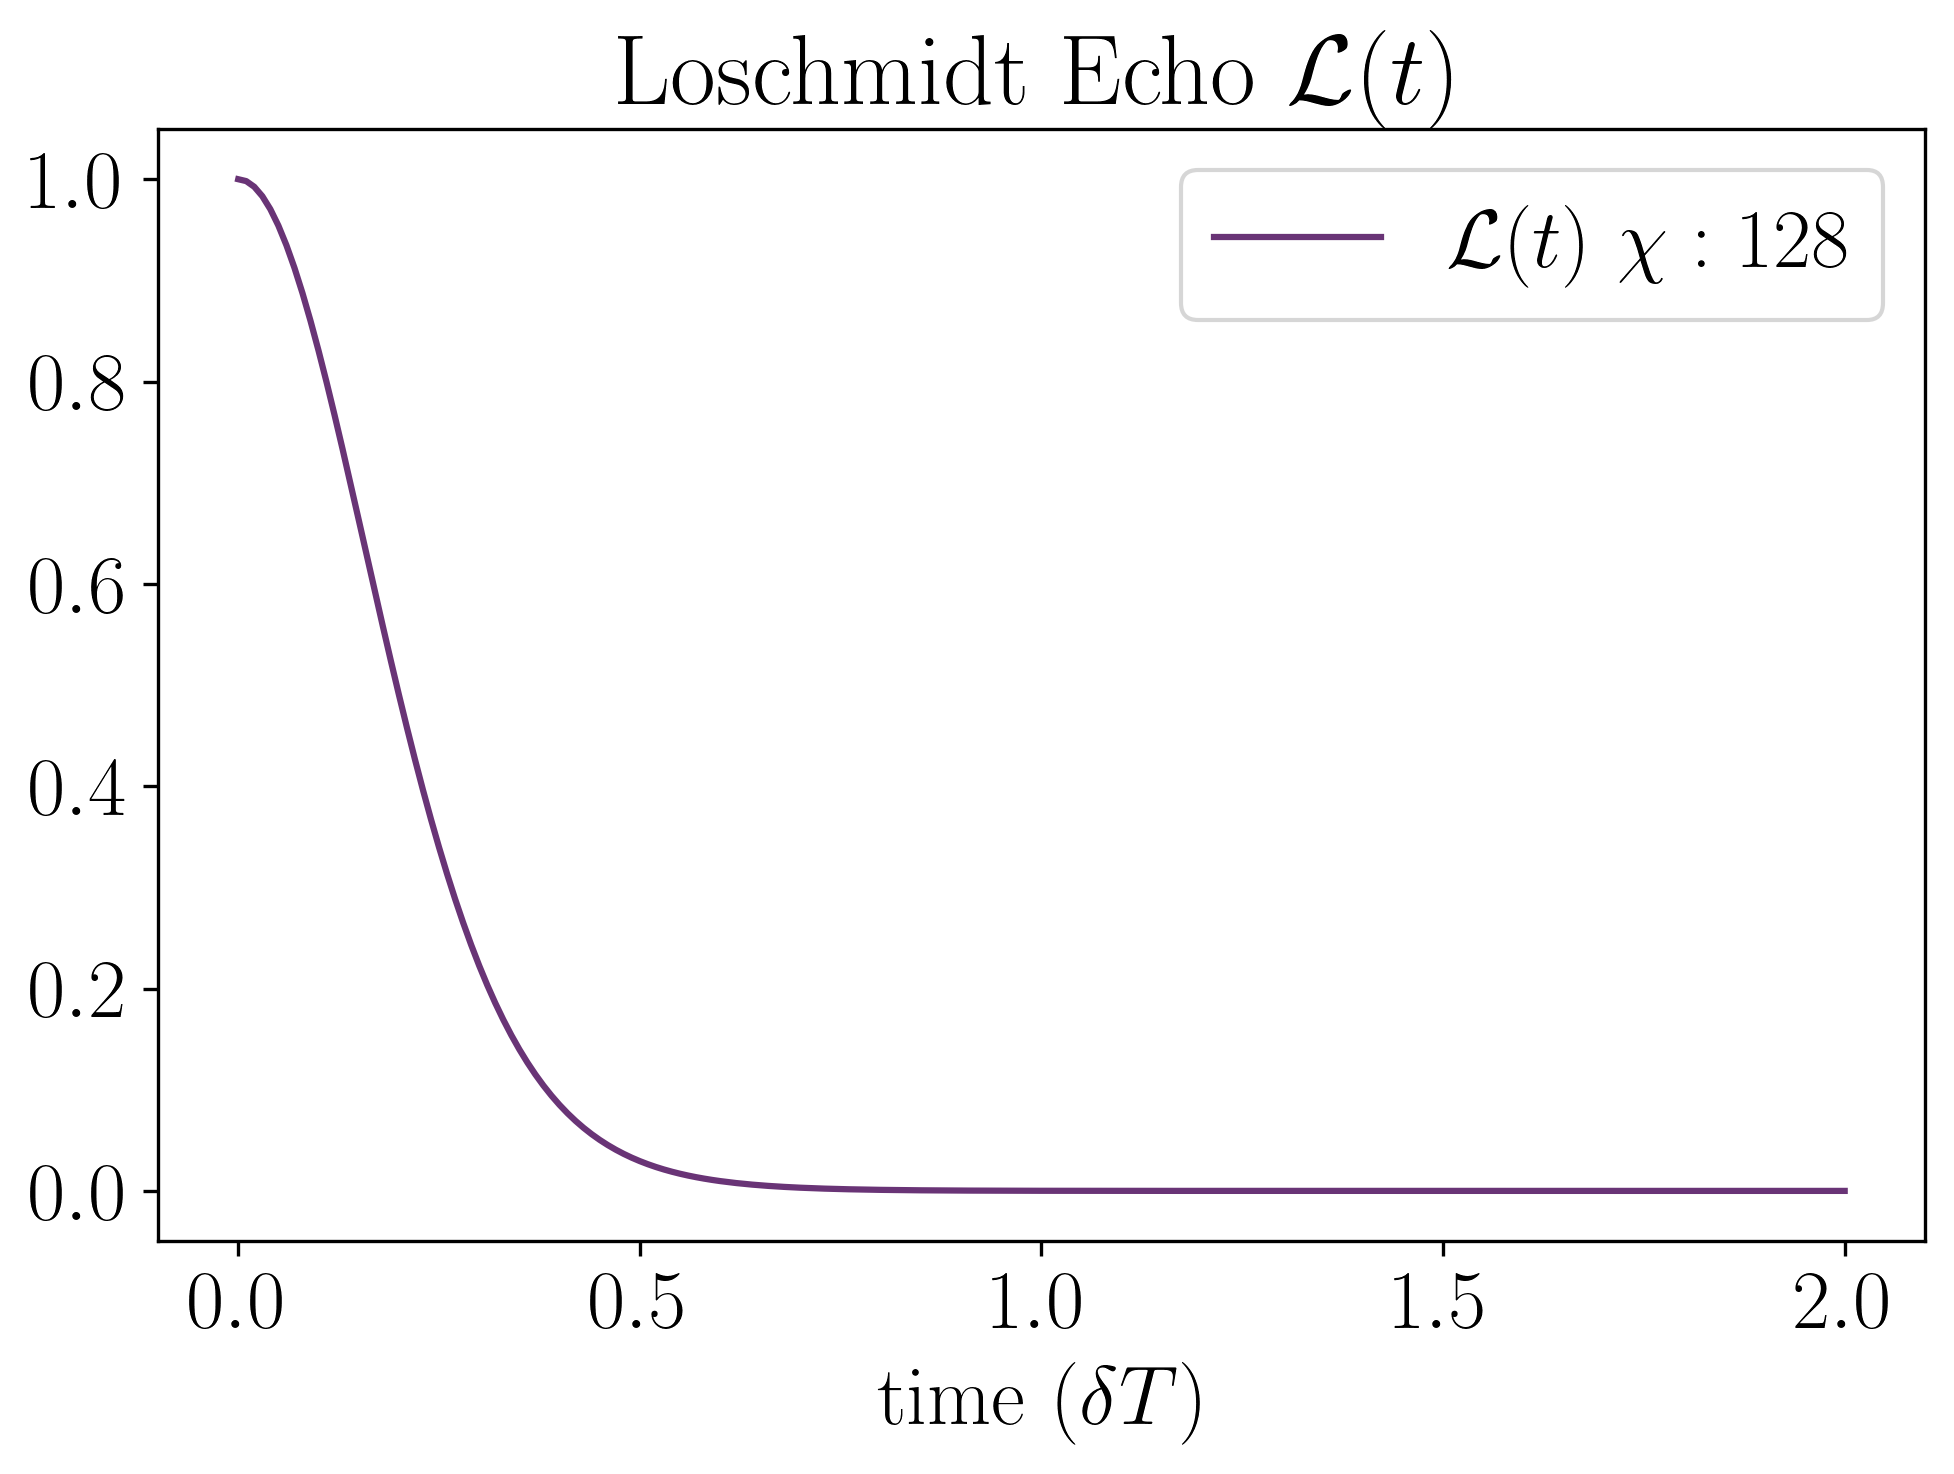

In [701]:
colors = create_sequential_colors(len(chis))
plt.title("Loschmidt Echo $\mathcal{L}(t)$")
for i, losch_amp in enumerate(losch):
    plt.plot(delta*np.asarray(range(steps+1)), [ov*ov.conjugate() for ov in losch_amp], linestyle="-", markersize=5, alpha=0.8, color=colors[i], label=f"$\mathcal{{L}}(t)$ $\chi: {chis[i]}$")
plt.xlabel("time $(\\delta T)$")
plt.legend()

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\R'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\I'
<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\R'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\I'
<>:7: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/3774349927.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Loschmidt Amplitude $\mathcal{G}(t)$")
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/3774349927.py:6: SyntaxWarning: invalid escape sequence '\R'
  plt.plot(delta*np.asarray(range(steps+1)), [ov.real for ov in losch_amp], linestyle="-", markersize=5, alpha=0.8, color=colors[i], label=f"$\Re[\mathcal{{G}}(t)]$ $\chi: {chis[i]}$")
/var/folder

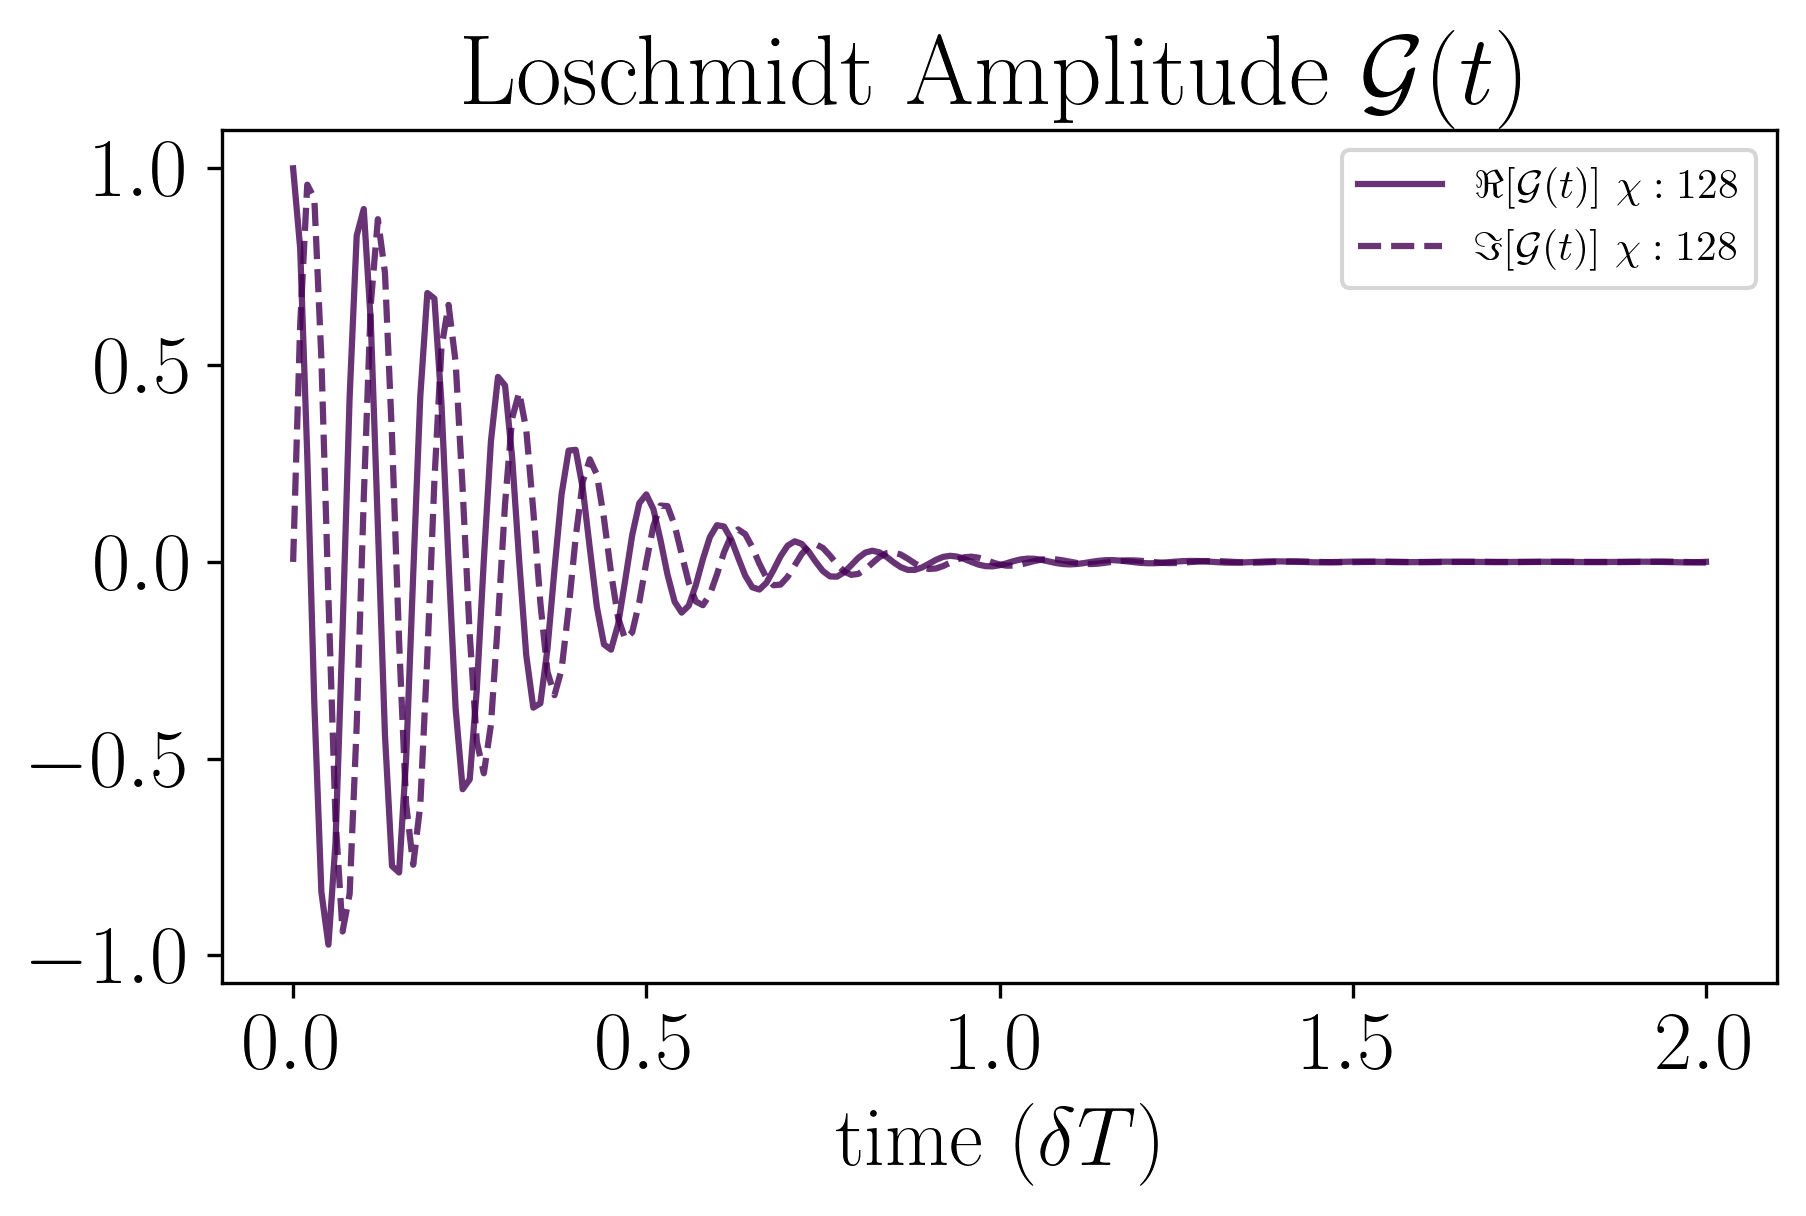

In [702]:
colors = create_sequential_colors(len(chis))
cm = 1/2.54  # centimeters in inches
plt.subplots(figsize=(15*cm, 10*cm))
plt.title("Loschmidt Amplitude $\mathcal{G}(t)$")
for i, losch_amp in enumerate(losch):
    plt.plot(delta*np.asarray(range(steps+1)), [ov.real for ov in losch_amp], linestyle="-", markersize=5, alpha=0.8, color=colors[i], label=f"$\Re[\mathcal{{G}}(t)]$ $\chi: {chis[i]}$")
    plt.plot(delta*np.asarray(range(steps+1)), [ov.imag for ov in losch_amp], linestyle="--", markersize=5, alpha=0.8, color=colors[i], label=f"$\Im[\mathcal{{G}}(t)]$ $\chi: {chis[i]}$")
plt.xlabel("time $(\\delta T)$")
plt.legend(fontsize=10)

<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\I'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\I'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/2429821501.py:2: SyntaxWarning: invalid escape sequence '\R'
  plt.plot(delta*np.asarray(range(steps+1)), [ov.real for ov in losch[-1]], linestyle="-", markersize=5, alpha=0.8, color="C1", label=f"$\Re[\mathcal{{G}}(t)]$ $\chi: {chis[i]}$")
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/2429821501.py:2: SyntaxWarnin

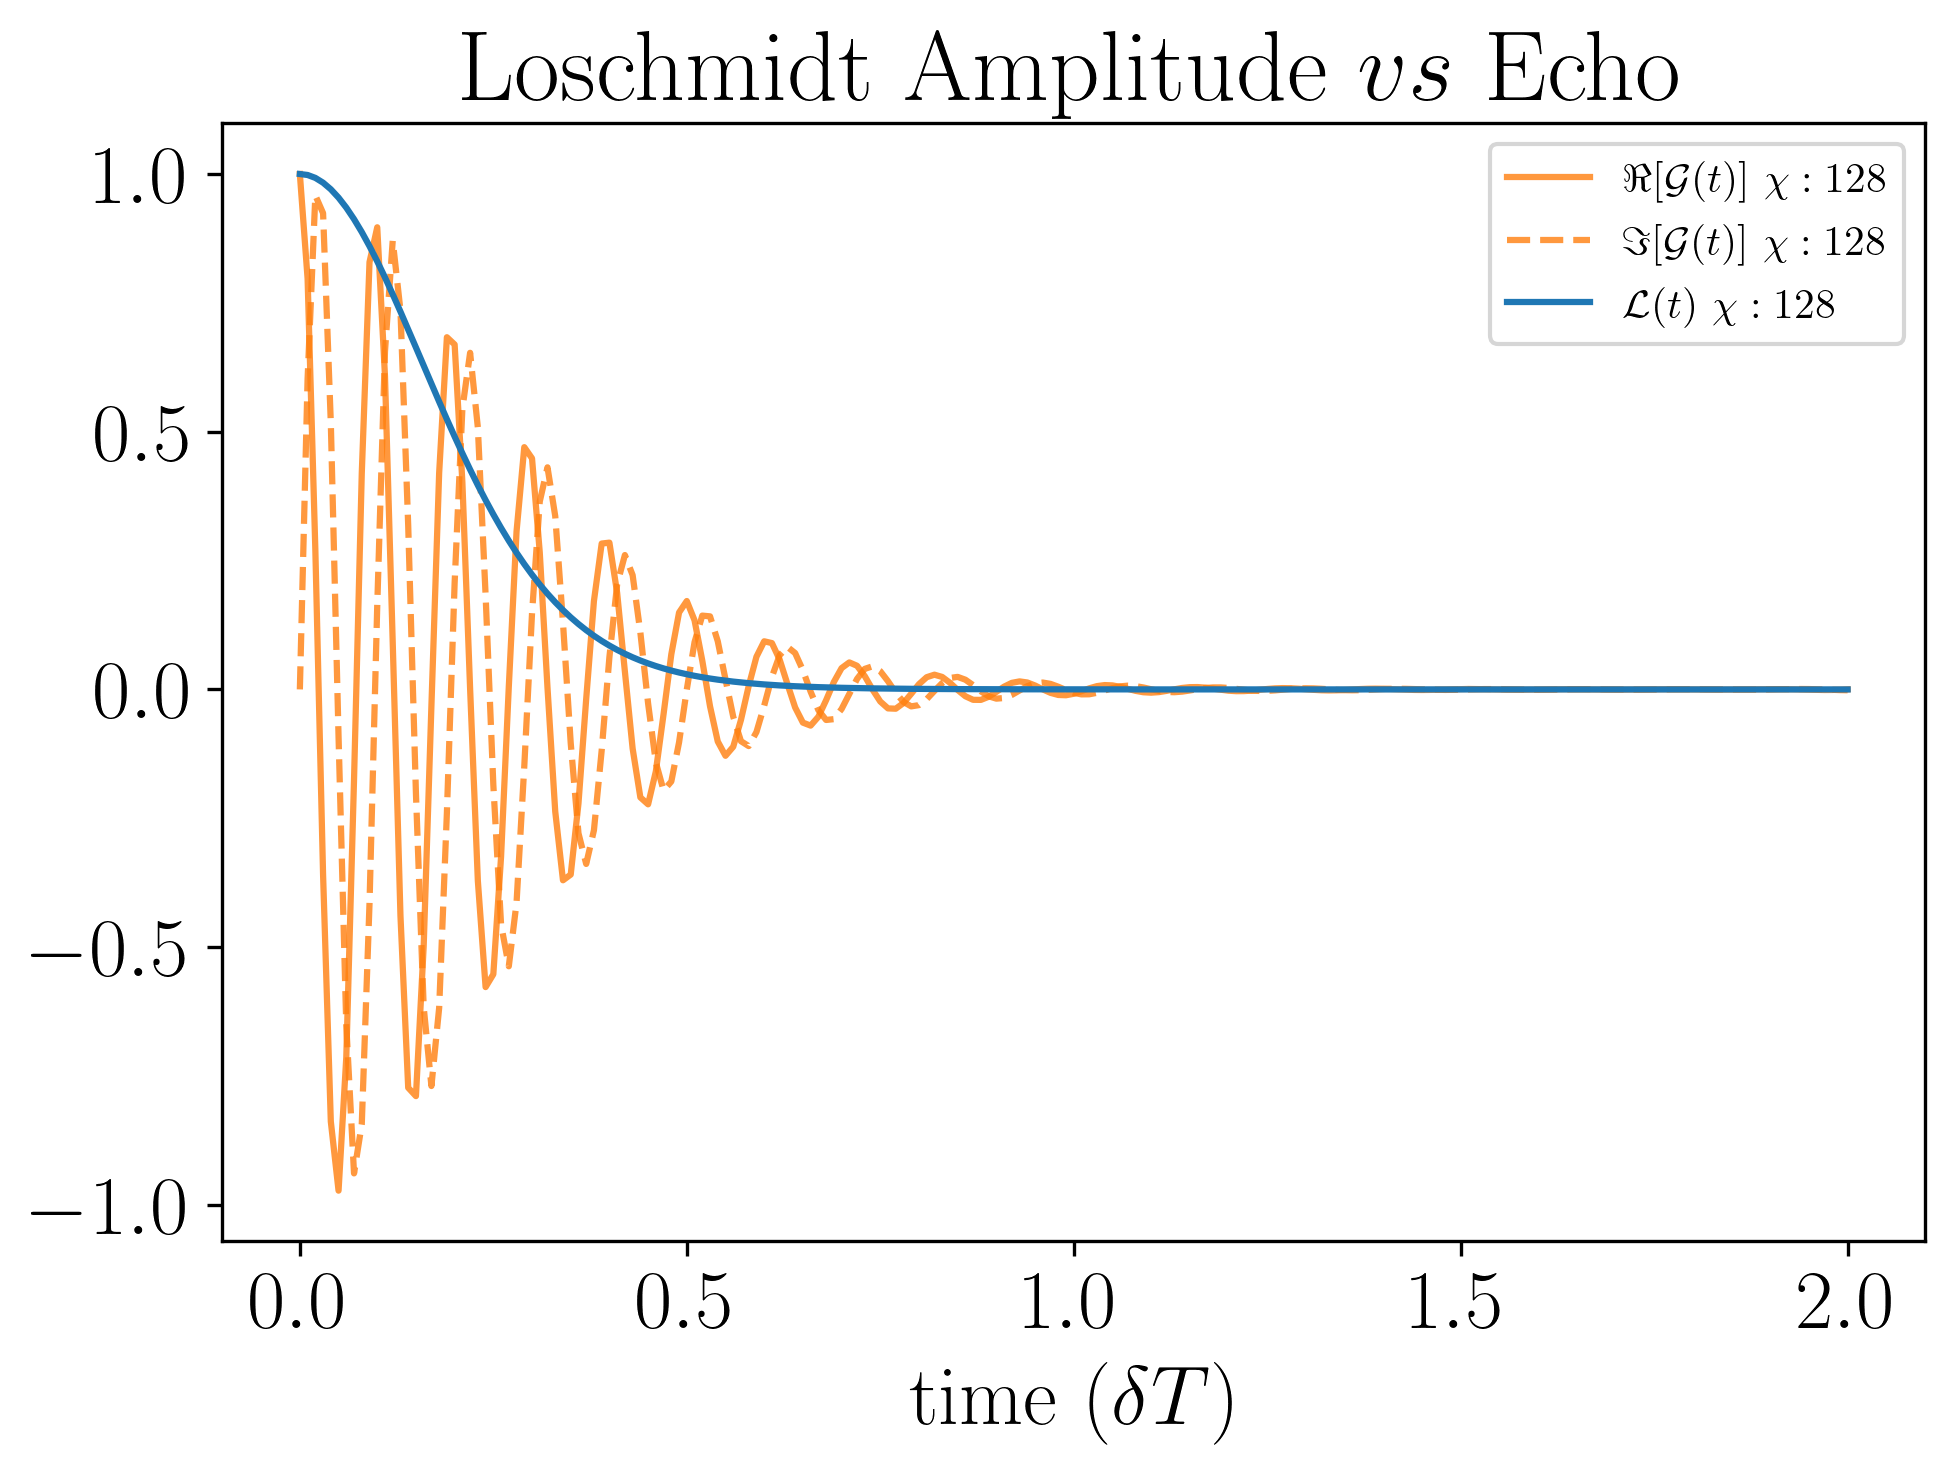

In [703]:
plt.title("Loschmidt Amplitude $vs$ Echo")
plt.plot(delta*np.asarray(range(steps+1)), [ov.real for ov in losch[-1]], linestyle="-", markersize=5, alpha=0.8, color="C1", label=f"$\Re[\mathcal{{G}}(t)]$ $\chi: {chis[i]}$")
plt.plot(delta*np.asarray(range(steps+1)), [ov.imag for ov in losch[-1]], linestyle="--", markersize=5, alpha=0.8, color="C1", label=f"$\Im[\mathcal{{G}}(t)]$ $\chi: {chis[i]}$")
plt.plot(delta*np.asarray(range(steps+1)), [ov*ov.conjugate() for ov in losch[-1]], linestyle="-", markersize=5, alpha=1, color="C0", label=f"$\mathcal{{L}}(t)$ $\chi: {chis[i]}$")
plt.xlabel("time $(\\delta T)$")
plt.legend(fontsize=10)

In [29]:
ele_fields = []
for chi in chis:
    elf = np.load(
        f"{path_tensor}/results/electric_field/electric_field_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
    ele_fields.append(elf)

<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/2149097896.py:10: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(delta*np.asarray(range(steps+1)), [np.mean([np.asarray(efields[i][0::2,2*(L//2) + 1])[j] for j in arr]) for i in range(steps+1)],linewidth=0.7, label="$S_{\perp}$ "+f"$\chi : {chis[k]}$")
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/2149097896.py:10: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(delta*np.asarray(range(steps+1)), [np.mean([np.asarray(efields[i][0::2,2*(L//2) + 1])[j] for j in arr]) for i in range(steps+1)],linewidth=0.7, label="$S_{\perp}$ "+f"$\chi : {chis[k]}$")
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_50907/2149097896.py:10: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(delta*

IndexError: list index out of range

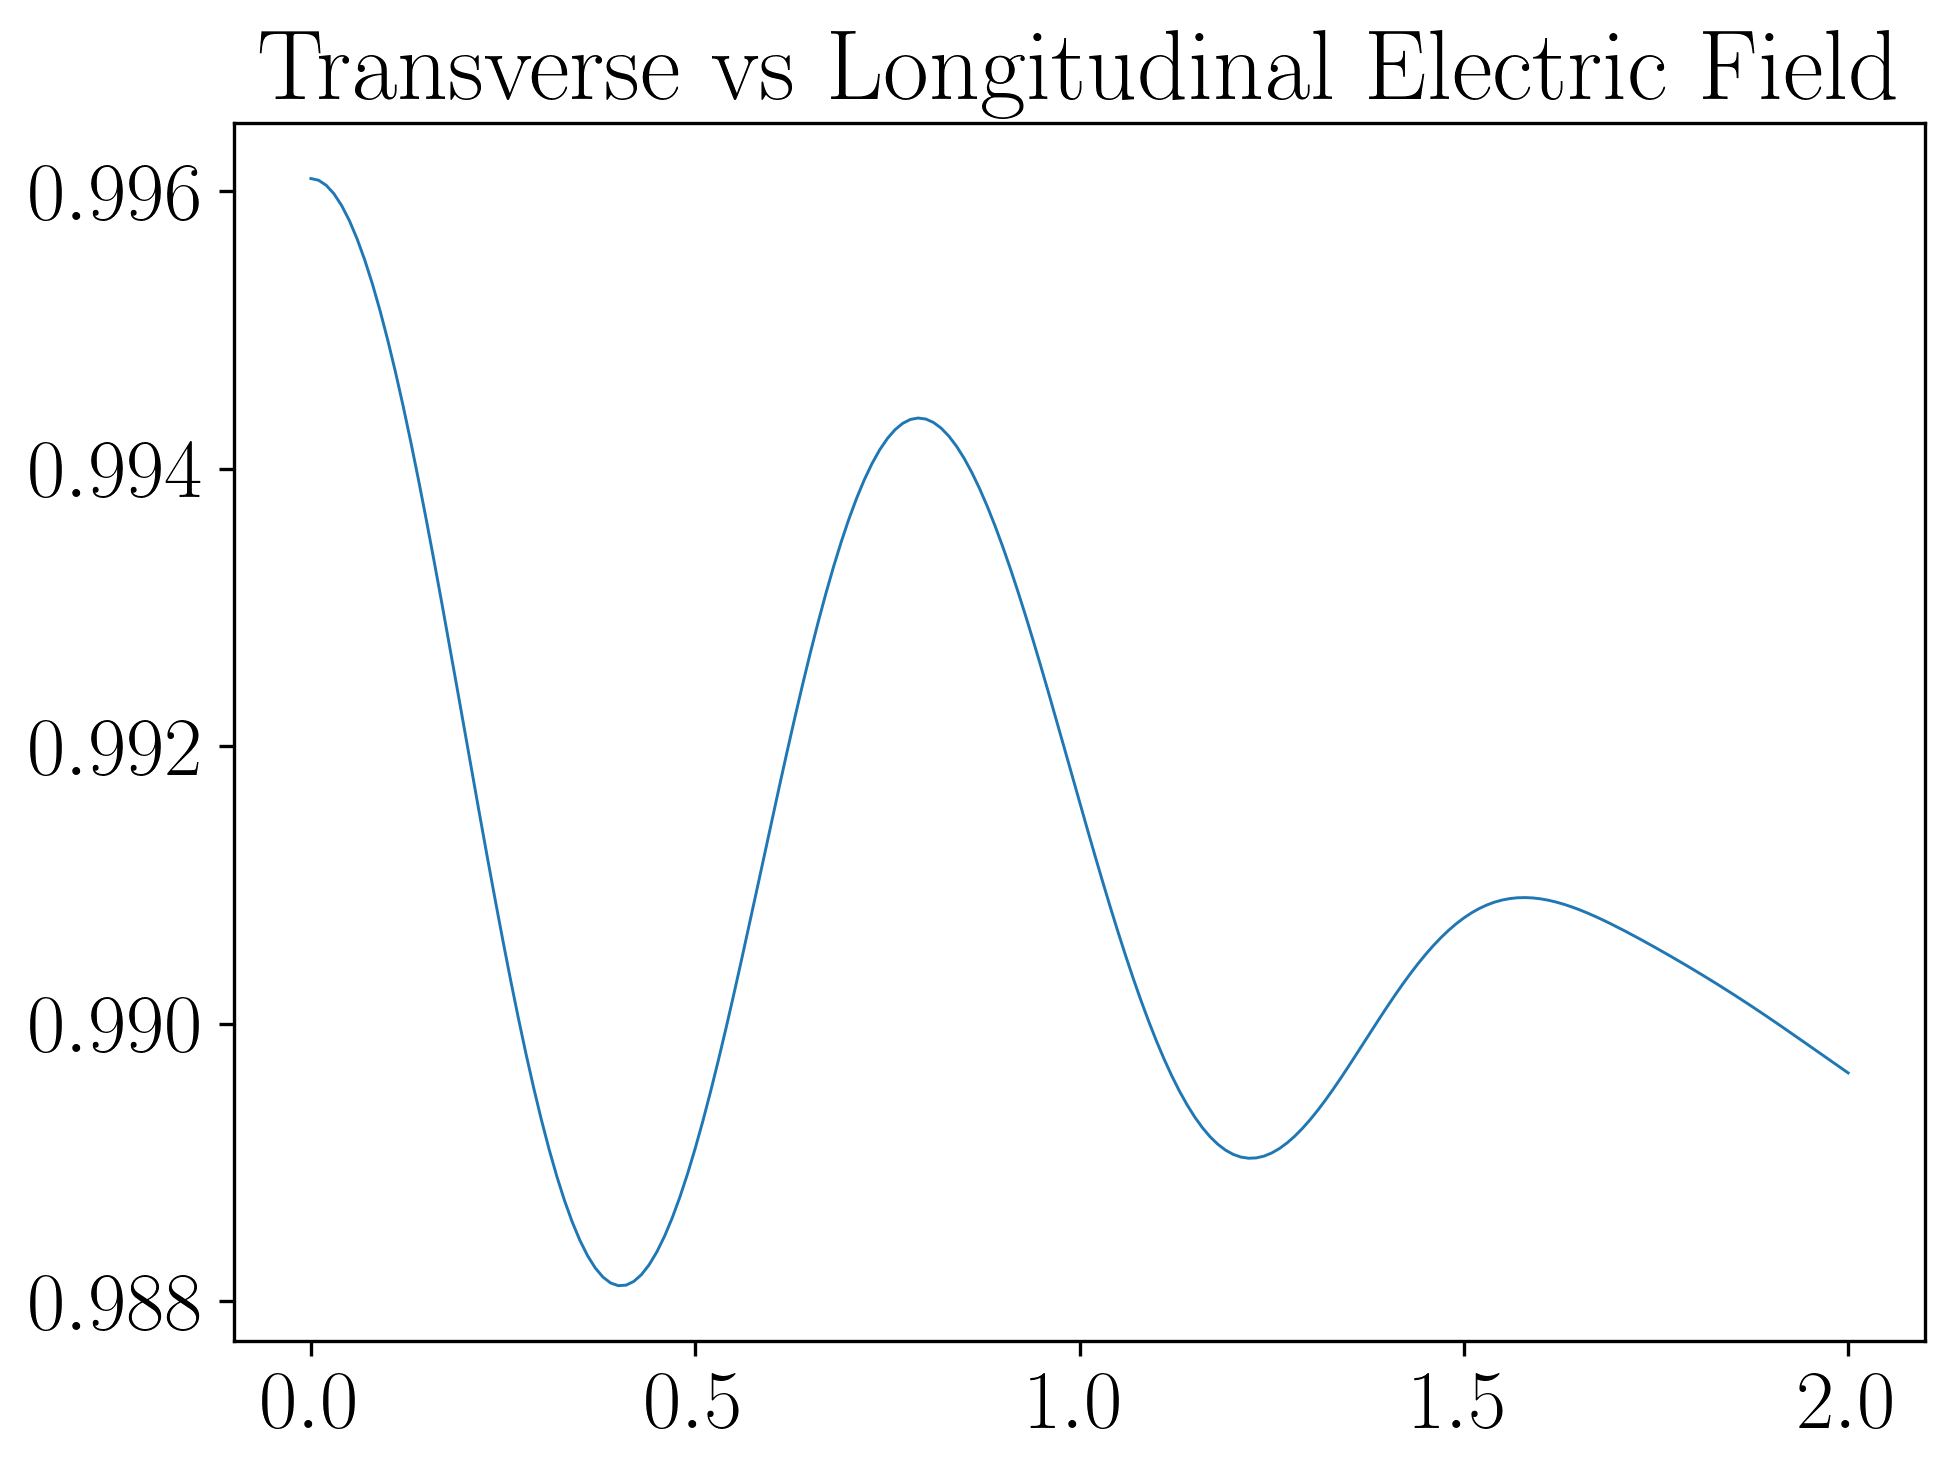

In [719]:
colorsb = create_sequential_colors(len(chis)*3, colormap_name="Blues")
colorso = create_sequential_colors(len(chis)*3, colormap_name="Oranges")
arr = list(range(-(l-1)//2,l//2+1))
arr.pop(l//2)

plt.title("Transverse vs Longitudinal Electric Field")
for k, efields in enumerate(ele_fields):
    # plt.plot(delta*np.asarray(range(steps+1)), [np.mean(efields[i][0][1::2][cx[0]:cx[1]]) for i in range(steps+1)],linewidth=0.7, color=colorsb[j*2+5], label="$S_{\parallel}$ "+f"$\chi : {chis[j]}$")
    # plt.plot(delta*np.asarray(range(steps+1)), [np.mean(efields[i][1::2,0::2], axis=0)[(L+1)//2] for i in range(steps+1)],linewidth=0.7, label="$S_{\perp}$ "+f"$\chi : {chis[j]}$")
    
    plt.plot(delta*np.asarray(range(steps+1)), [np.mean([np.asarray(efields[i][0::2,2*(L//2) + 1])[j] for j in arr]) for i in range(steps+1)],linewidth=0.7, label="$S_{\perp}$ "+f"$\chi : {chis[k]}$")

plt.grid(True)
plt.xlabel("time $(\\delta T)$")
plt.legend(fontsize=10)

[-2, -1, 1, 2]

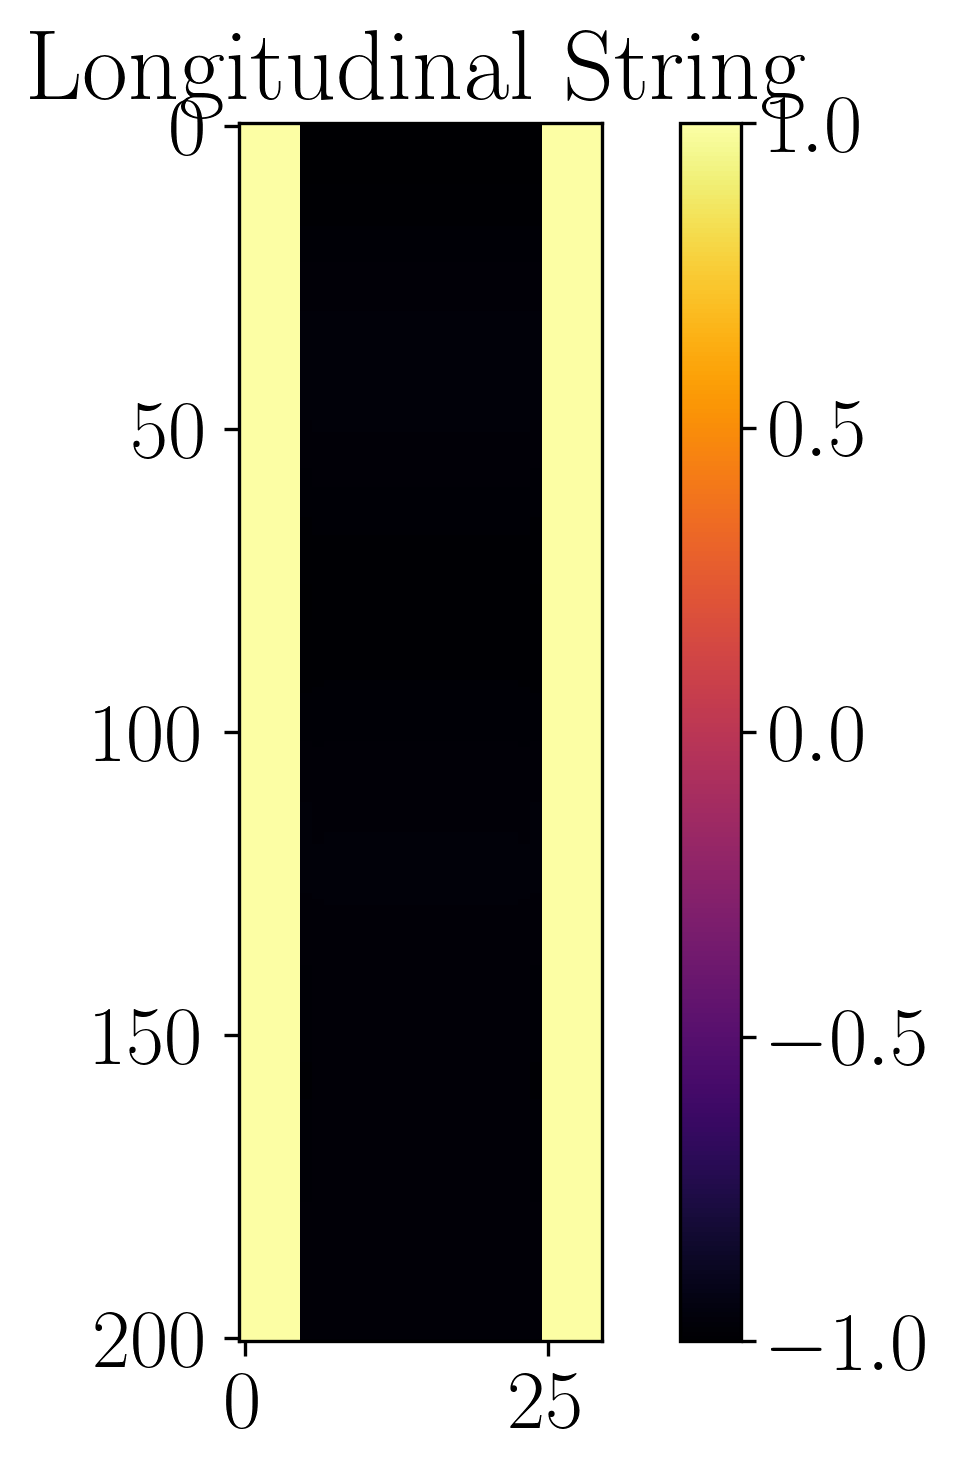

In [705]:
plt.title("Longitudinal String")
plt.imshow([efields[i][0][1::2] for i in range(steps+1)], cmap="inferno", vmin=-1, vmax=1, aspect=1/2)
plt.colorbar()

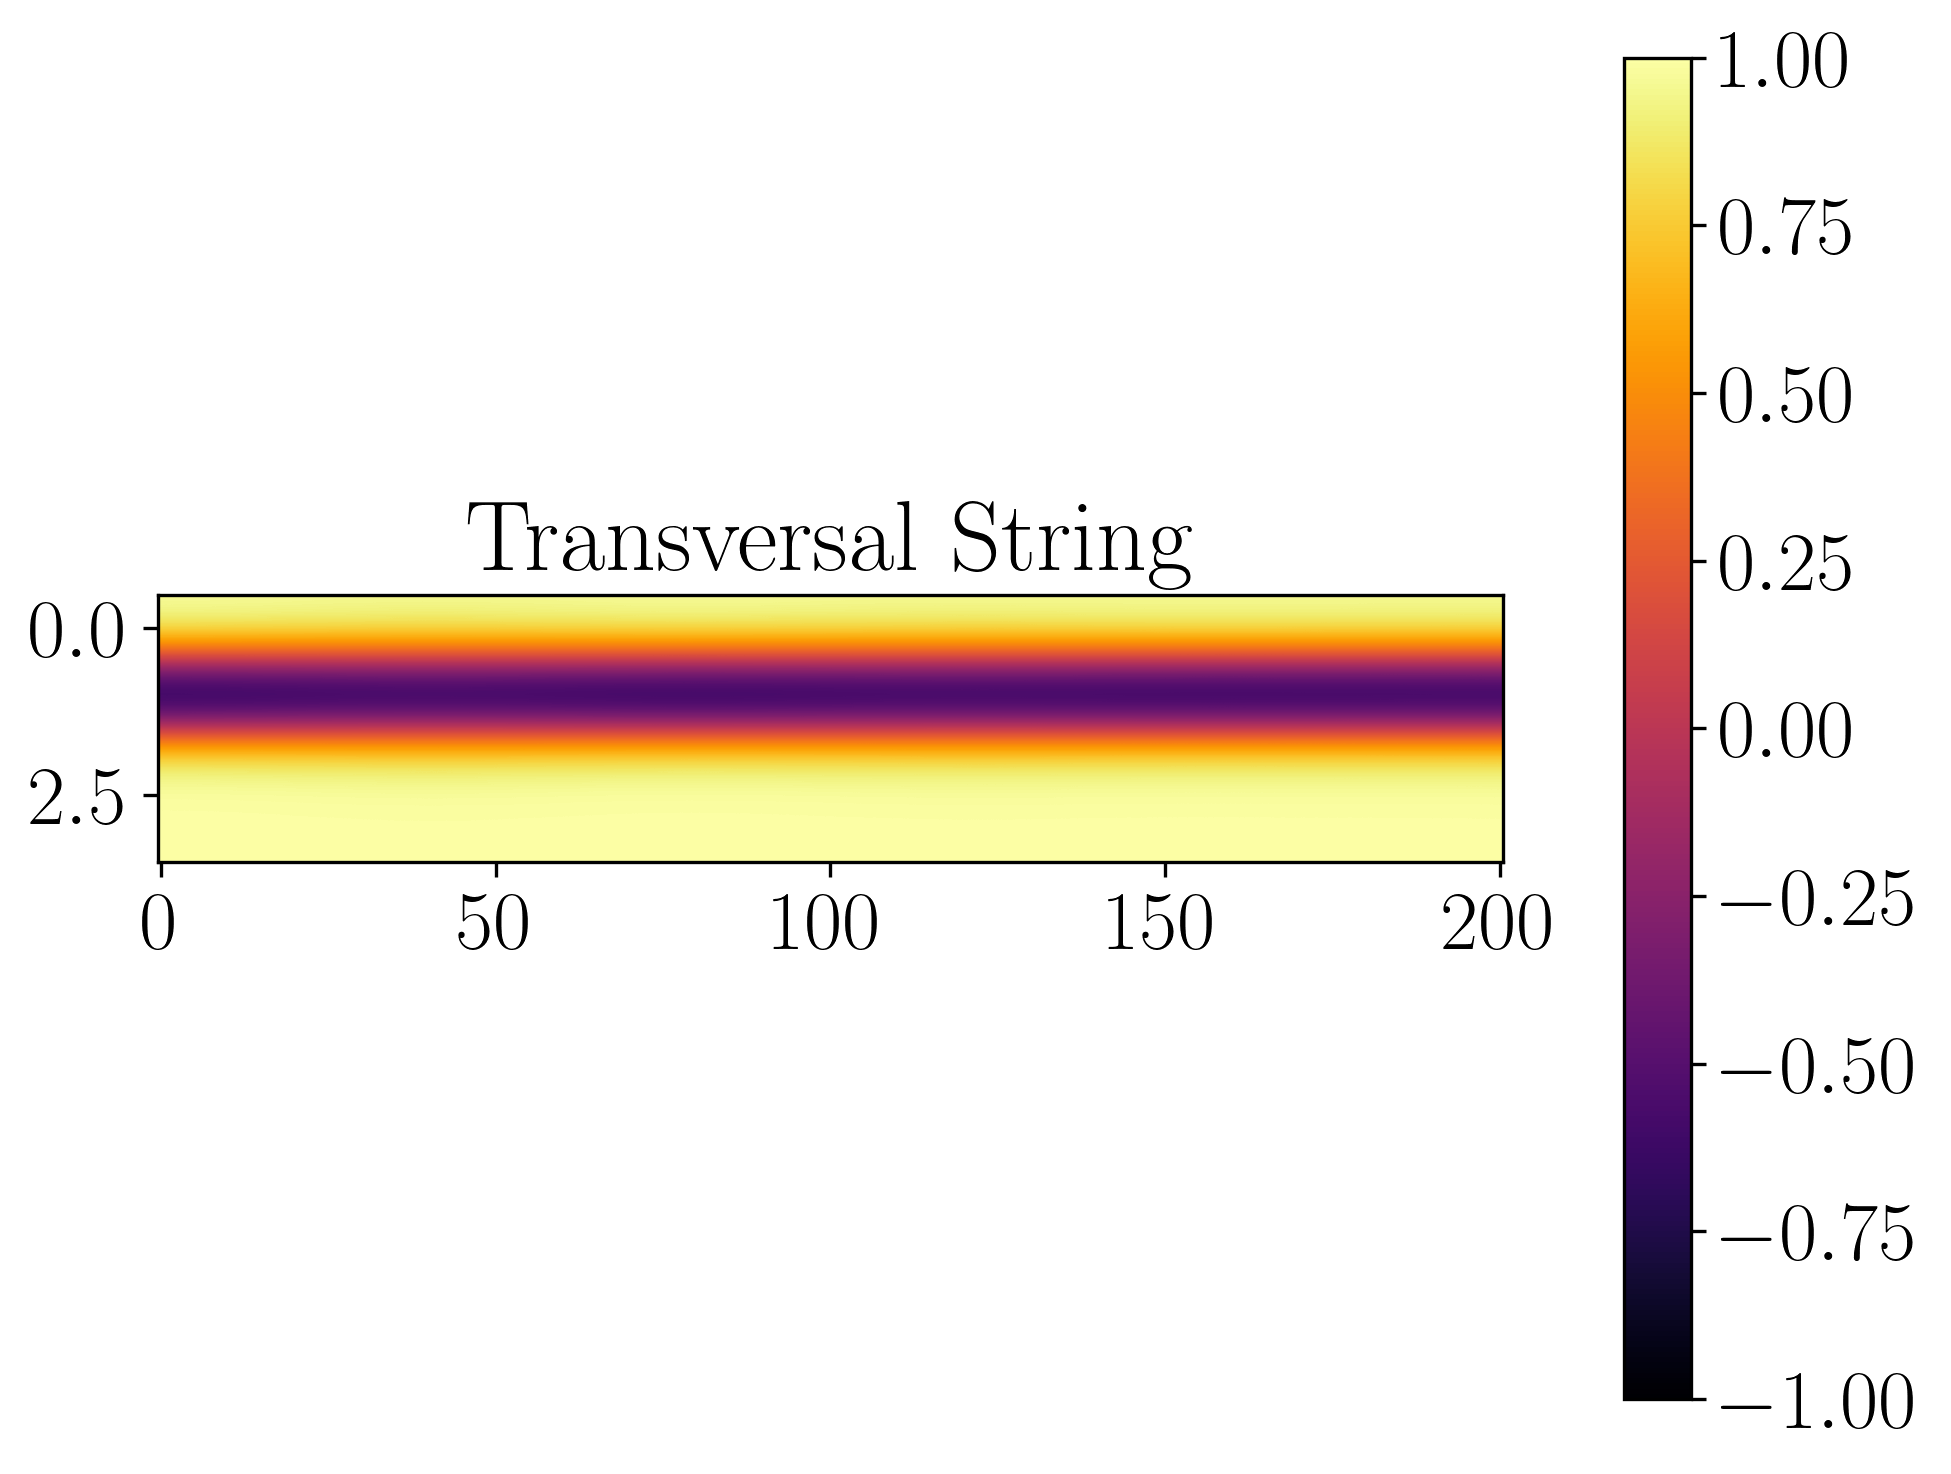

In [706]:
string_arr = [(np.asarray(efields[i][0::2,2*(L//2) + 1])[-1], 
                  np.asarray(efields[i][0::2,2*(L//2) + 1])[0],
                  np.asarray(efields[i][0::2,2*(L//2) + 1])[1],
                  np.asarray(efields[i][0::2,2*(L//2) + 1])[2]) for i in range(steps+1)]
plt.title("Transversal String")
plt.imshow(np.asarray(string_arr).T, cmap="inferno", vmin=-1, vmax=1, aspect=10 , interpolation="gaussian")
plt.colorbar()

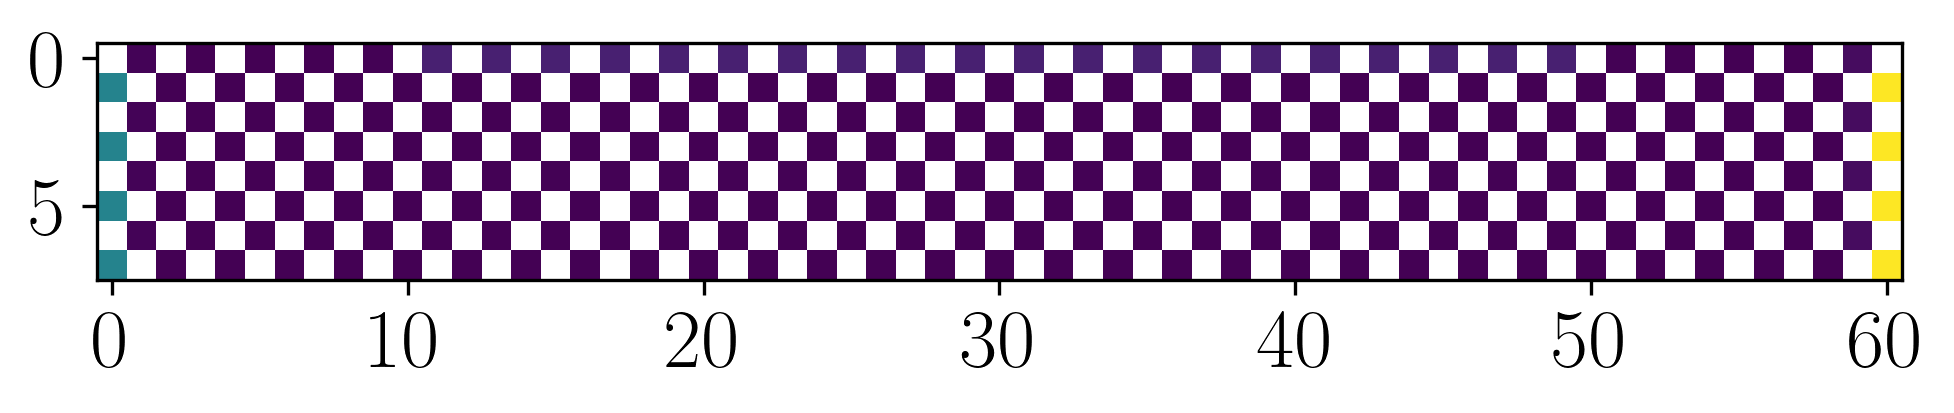

In [454]:
plt.imshow(efields[-1])

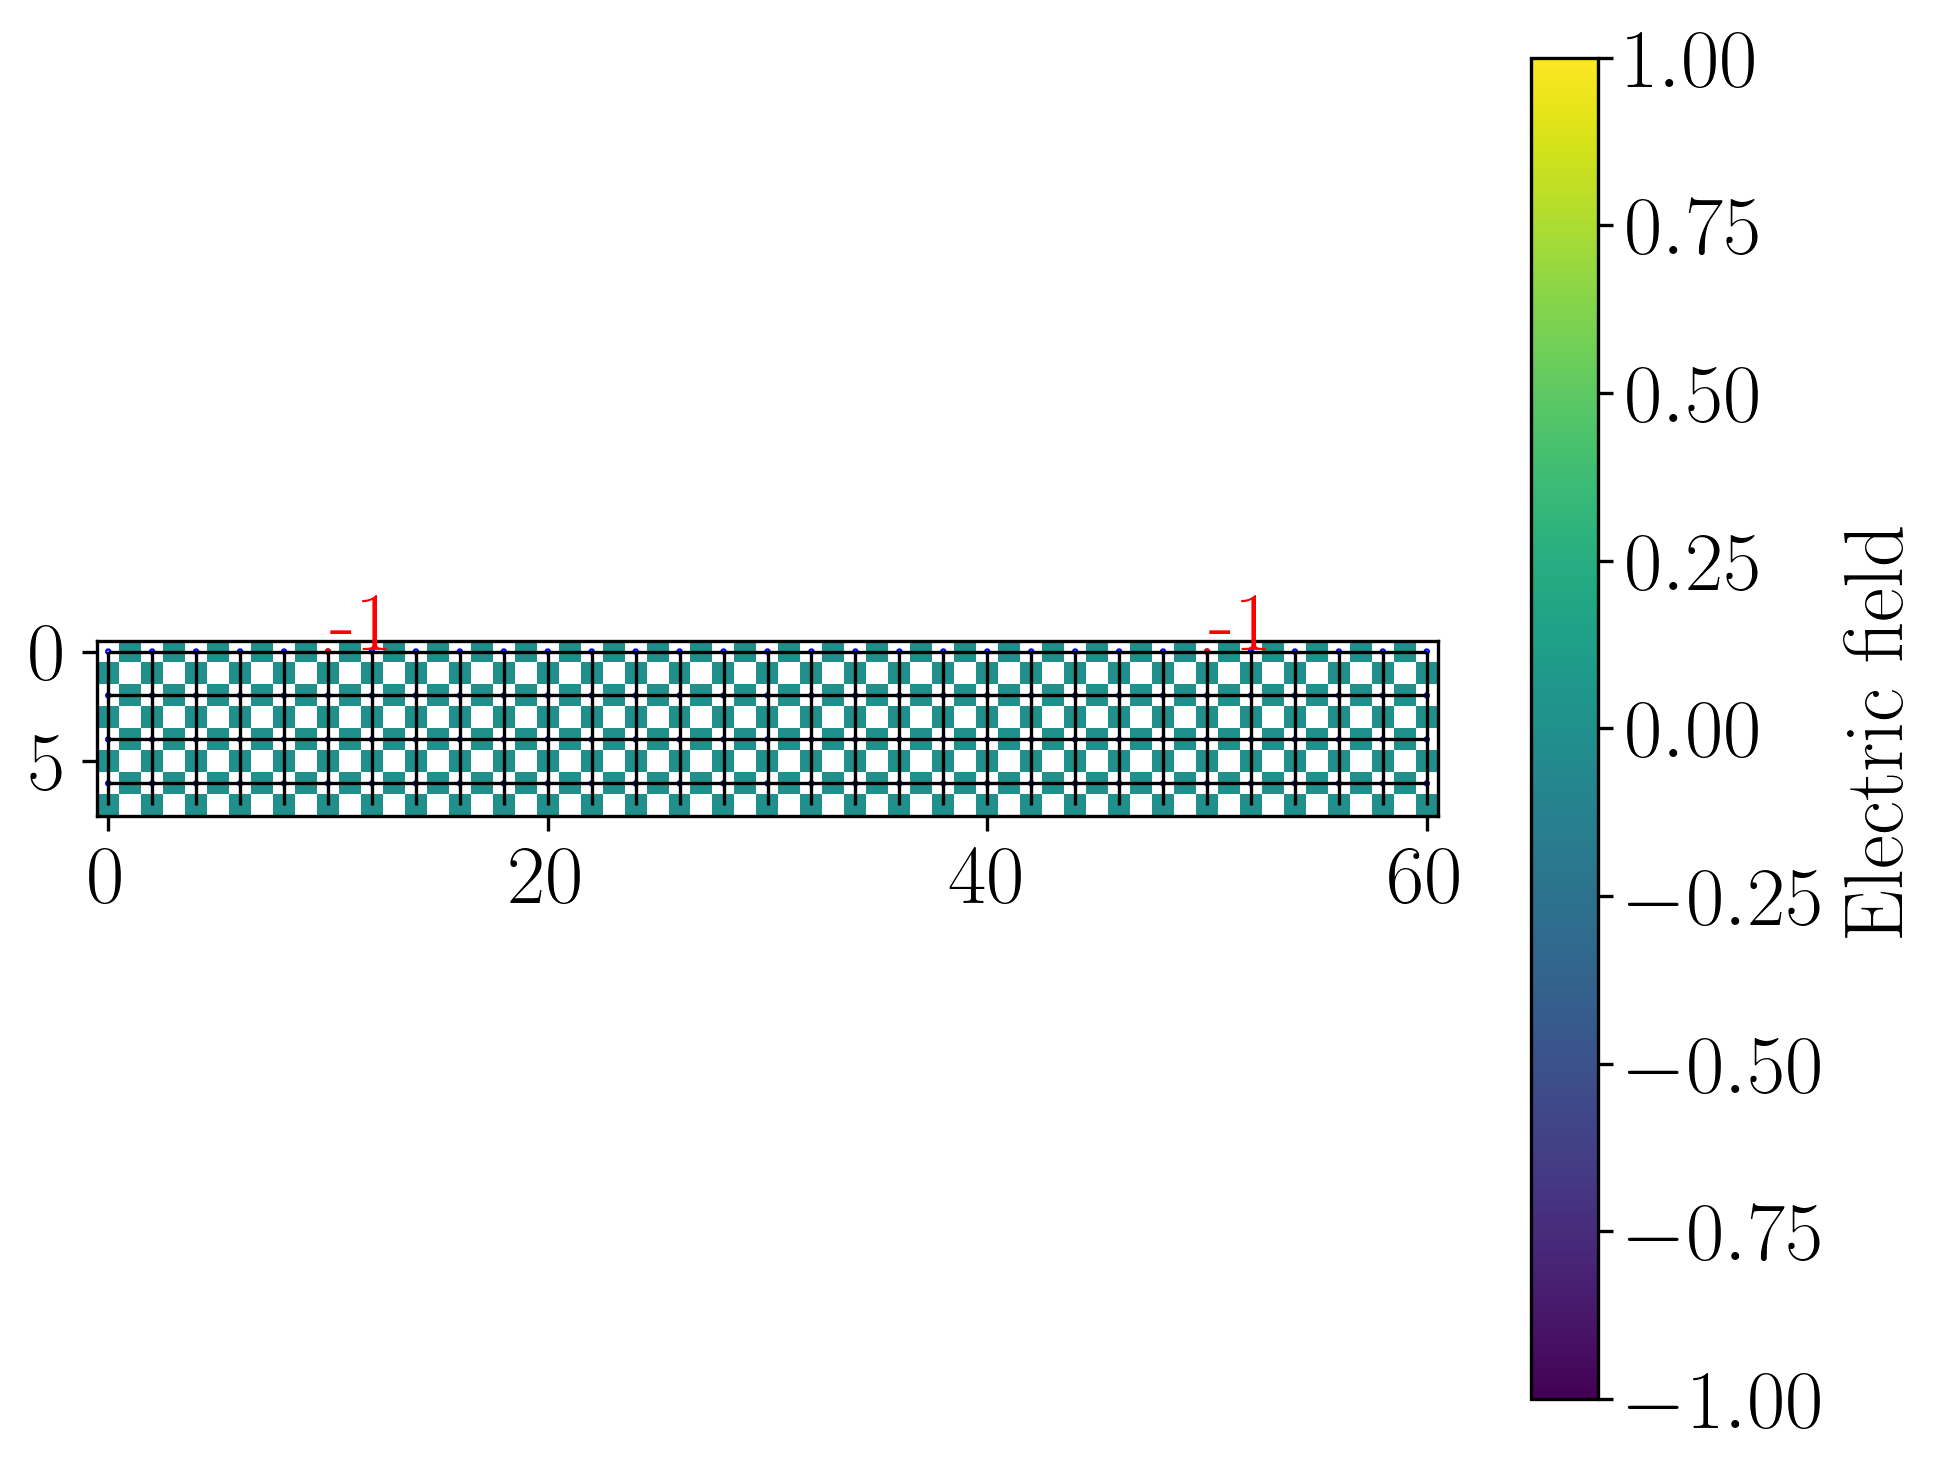

In [455]:
if save_gif:
    movie = anim(frames=steps+1, interval=200, data=efields, params=np.linspace(0,steps*delta,steps+1), show=True, charges_x=cx, charges_y=cy, precision=2, time=True)
    movie.save(filename=f"quench_mpo_{l}x{L}_g_start_{h_i}_g_ev_{h_ev}_trott_steps_{steps}_delta_{delta}_chi_{chi}.gif")

<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_31100/3833416781.py:10: SyntaxWarning: invalid escape sequence '\c'
  label = f"$g: {h_ev}$ $\chi: {chis[-1]}$"


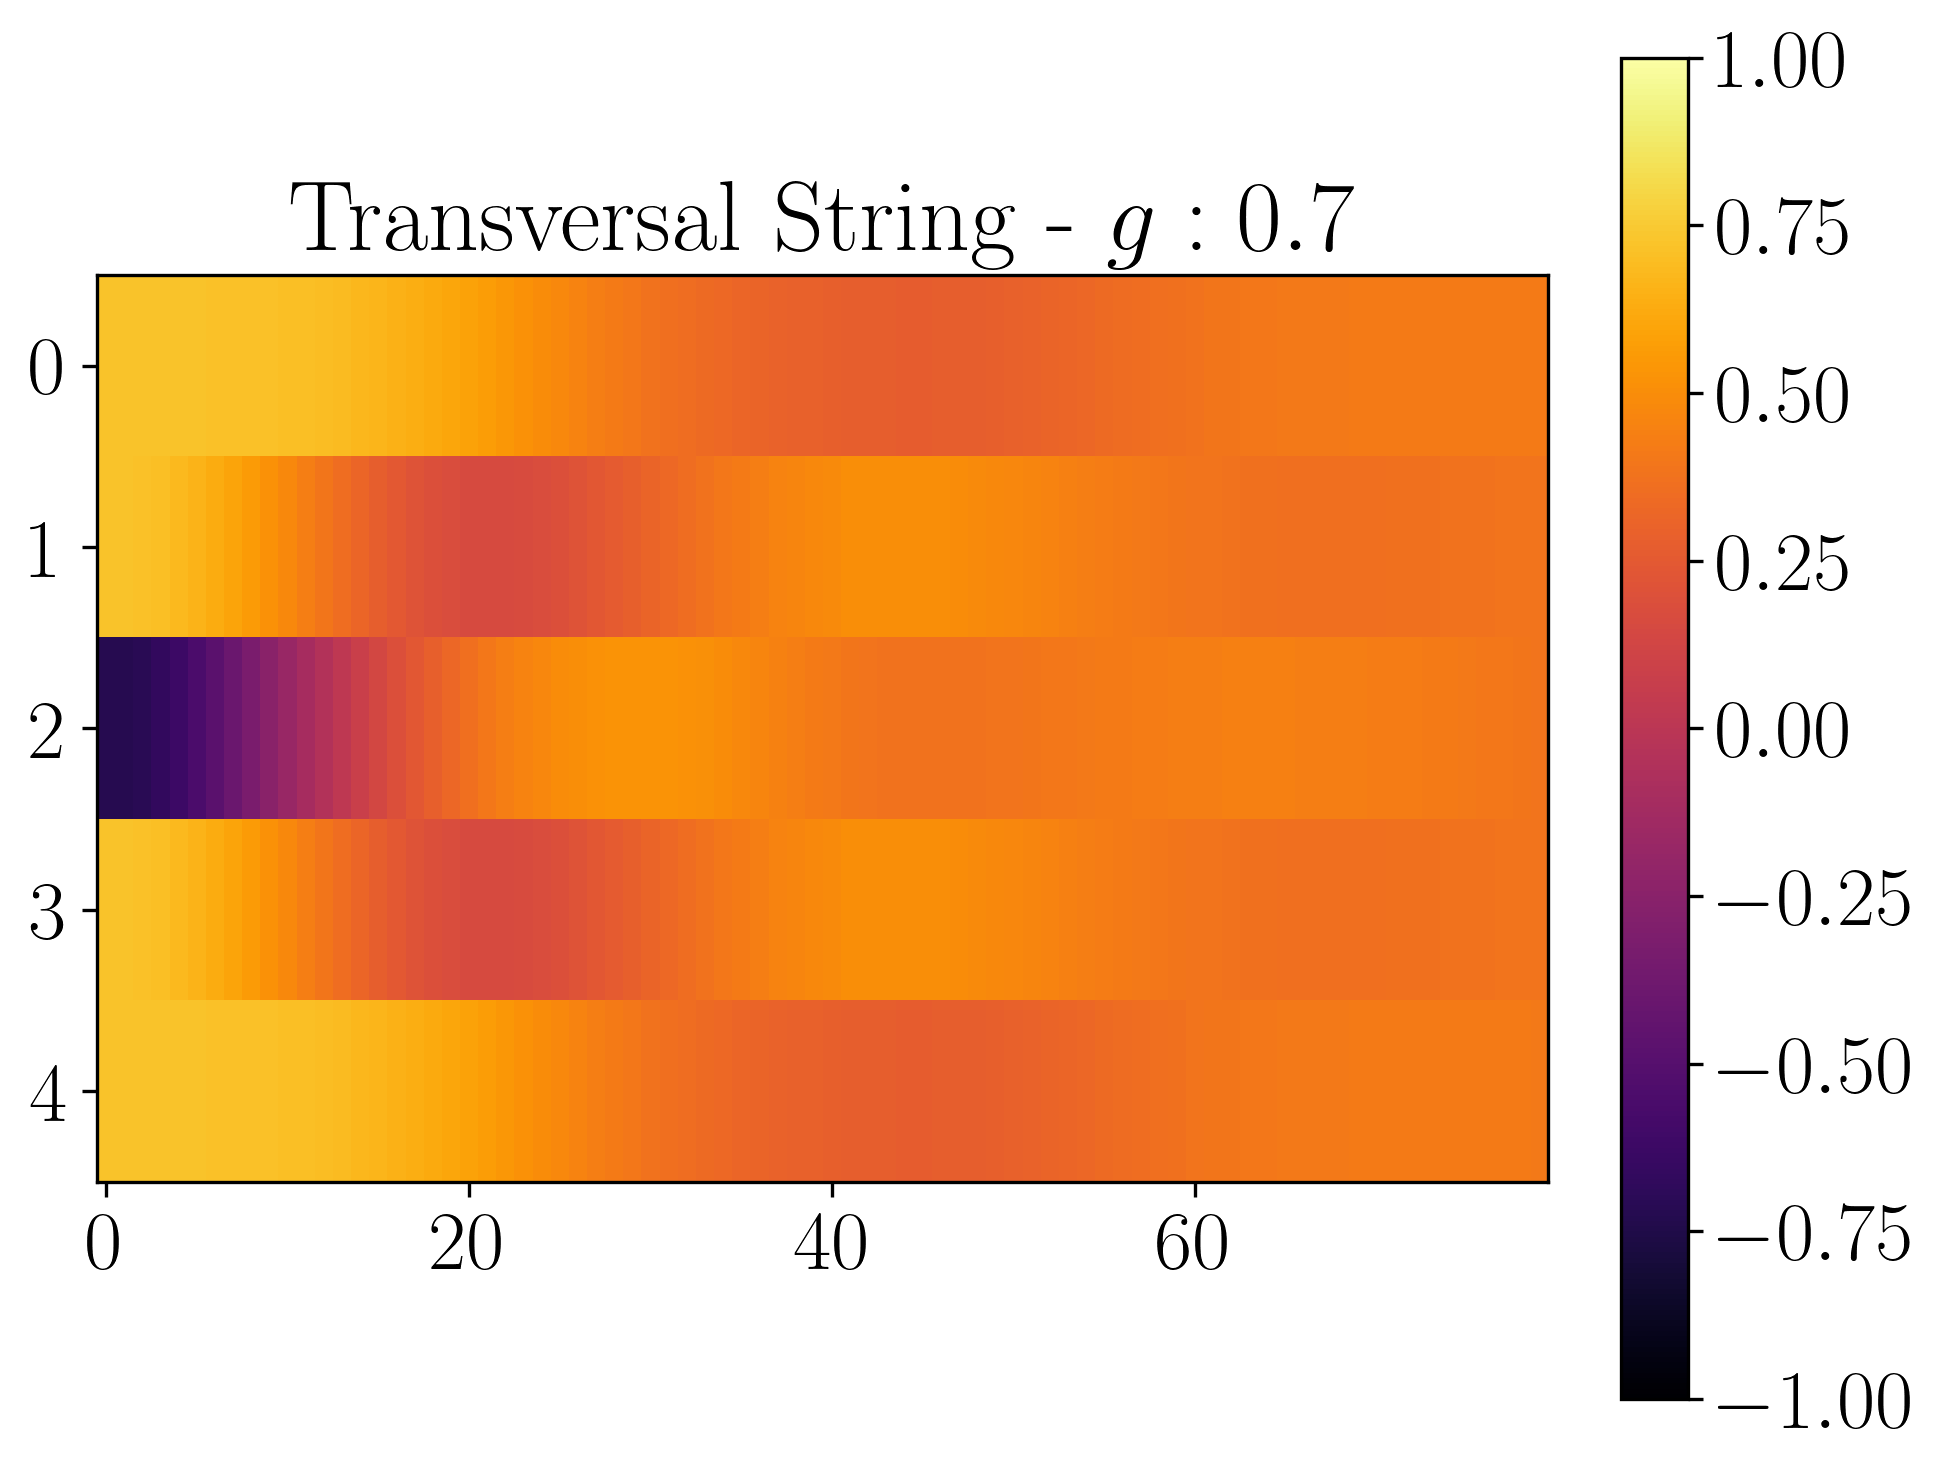

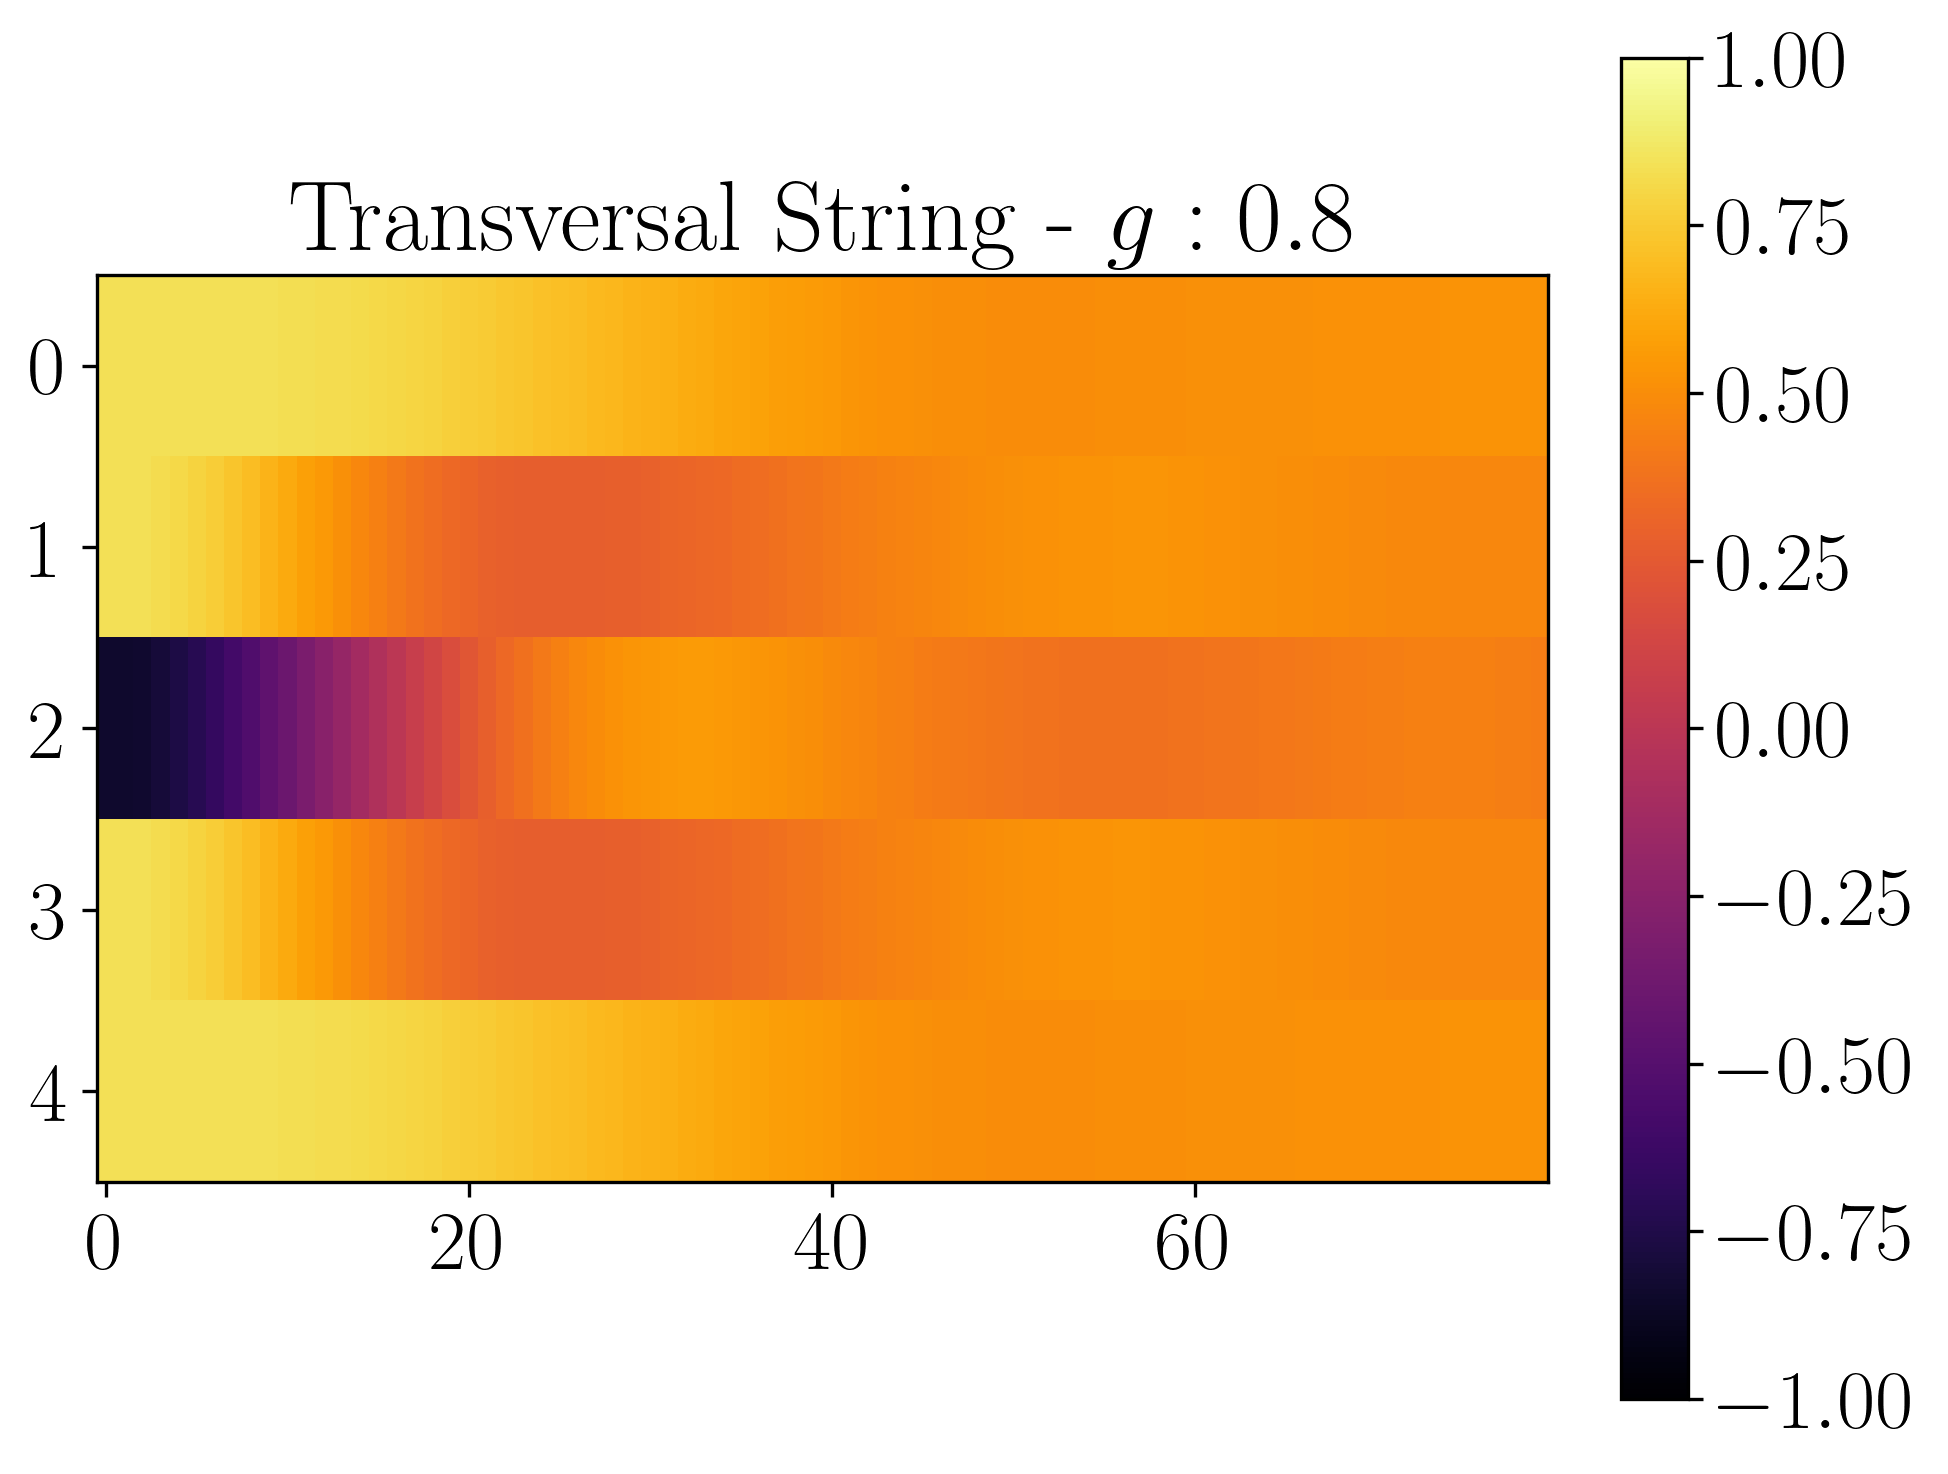

In [83]:
h_evs = [0.1, 0.725, 2.0]
h_evs = [0.7, 0.8]
# h_evs = [0.725]
of = 0.2
chis = [64]
R = 10
for i, h_ev in enumerate(h_evs):
    h_i = h_ev
    entropies = []
    label = f"$g: {h_ev}$ $\chi: {chis[-1]}$"
    for j, chi in enumerate(chis):
        # entr_chi = load_list_of_lists(
        #     f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
        elf = np.load(
        f"{path_tensor}/results/electric_field/electric_field_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
        string_arr = [(np.asarray(elf[i][0::2,2*(L//2) + 1])[-2], 
                  np.asarray(elf[i][0::2,2*(L//2) + 1])[-1],
                  np.asarray(elf[i][0::2,2*(L//2) + 1])[0],
                  np.asarray(elf[i][0::2,2*(L//2) + 1])[1],
                  np.asarray(elf[i][0::2,2*(L//2) + 1])[2]) for i in range(int((steps+1)*of))]
    plt.title(f"Transversal String - $g: {h_ev}$")
    plt.imshow(np.asarray(string_arr).T, cmap="inferno", vmin=-1, vmax=1, aspect=10) #, interpolation="gaussian")
    plt.colorbar()
    plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_31100/523750833.py:10: SyntaxWarning: invalid escape sequence '\c'
  label = f"$g: {h_ev}$ $\chi: {Rs[-1]}$"


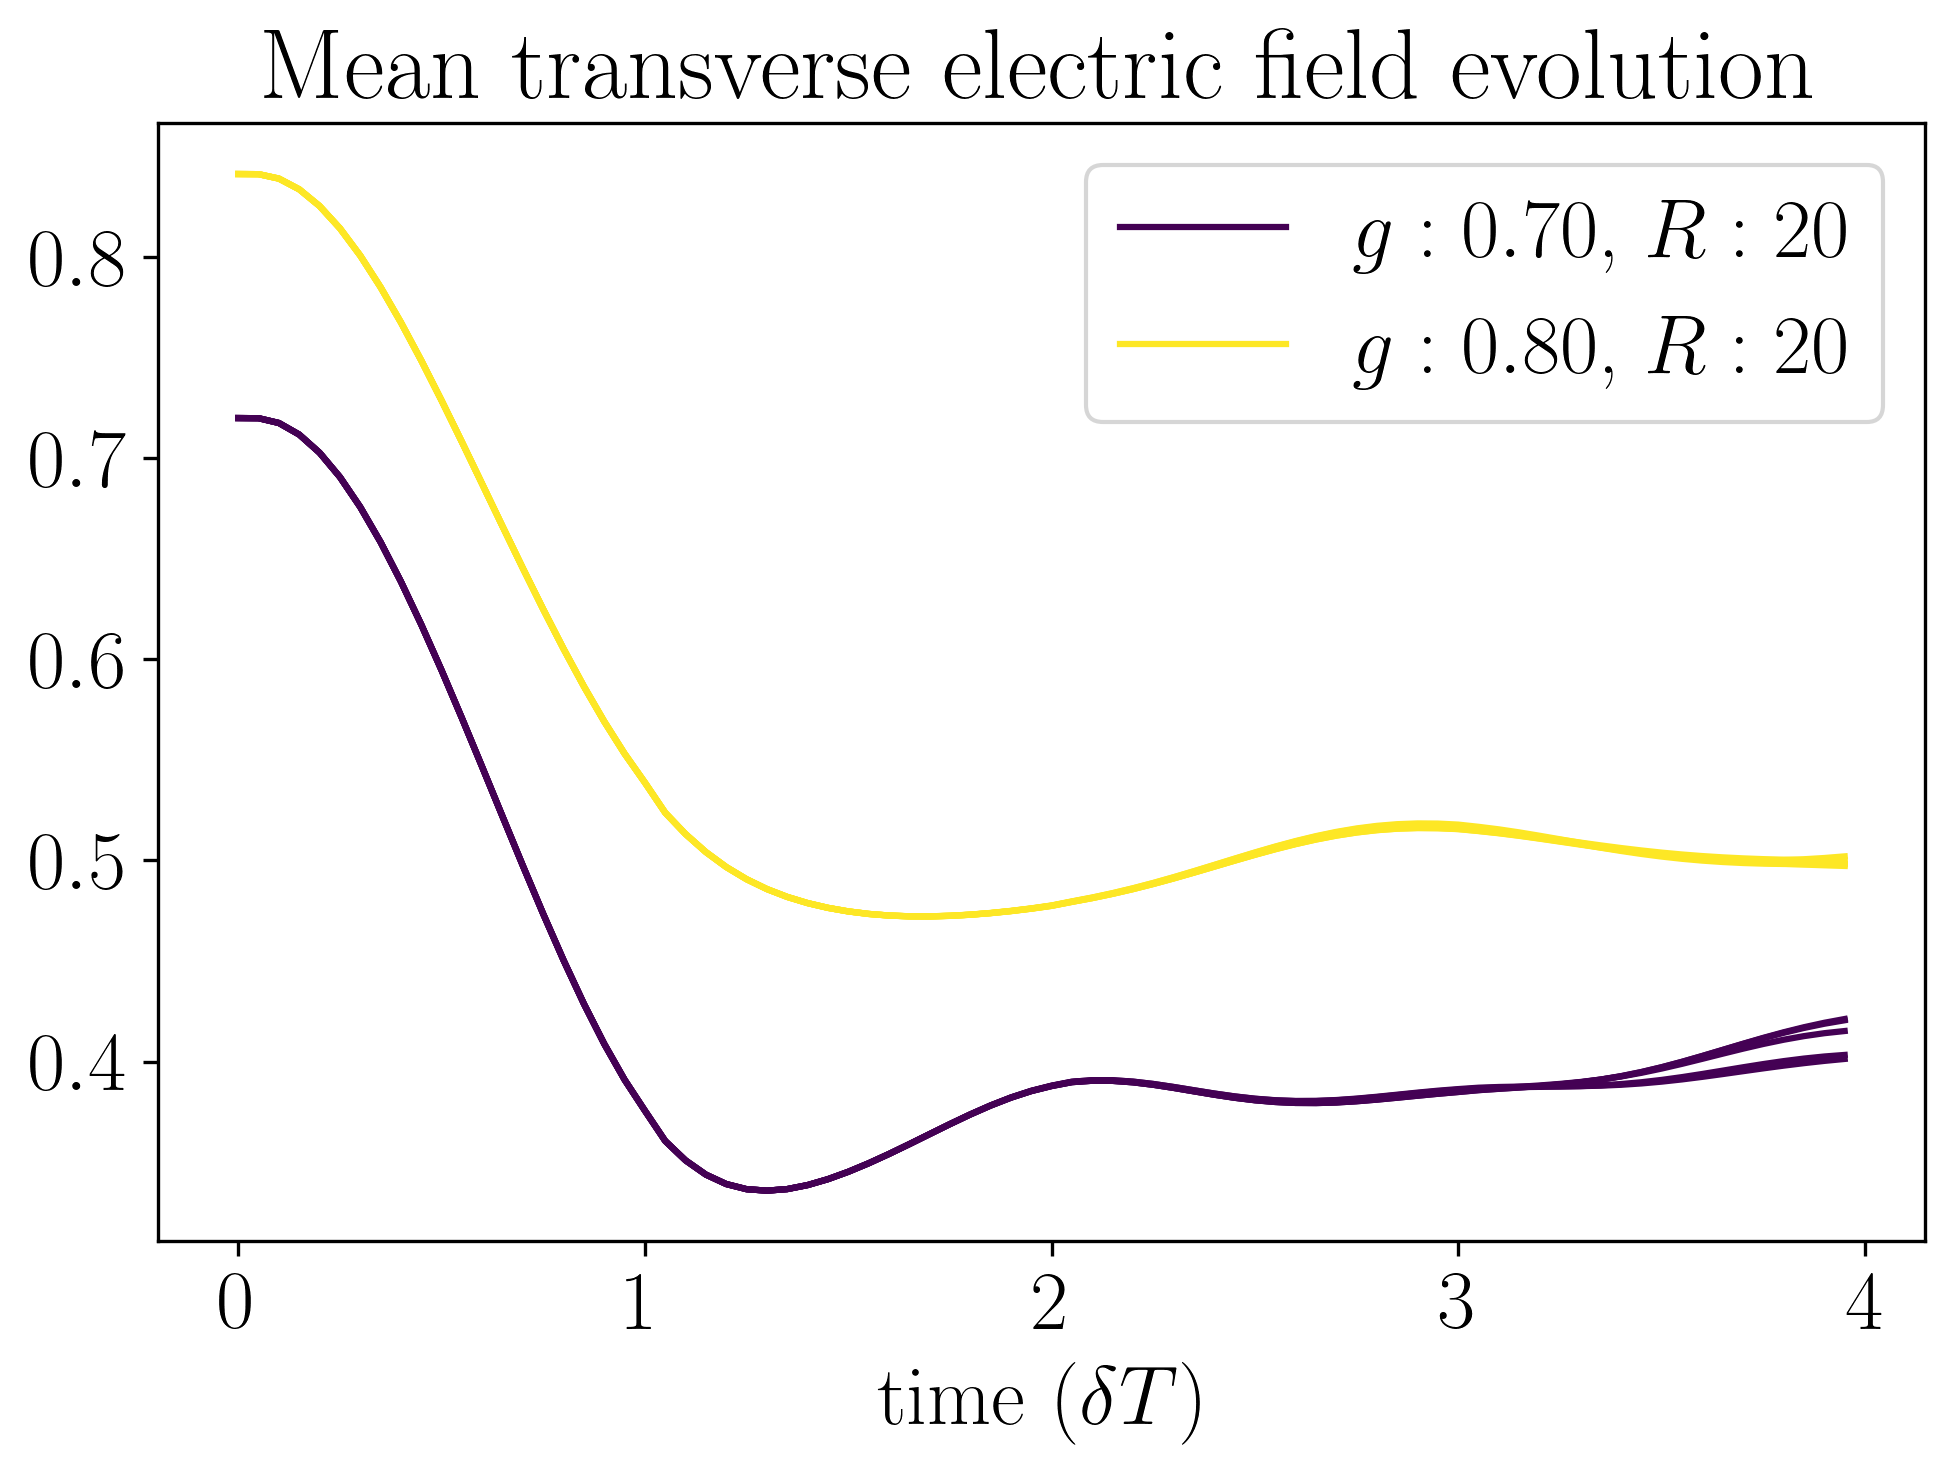

In [85]:
h_evs = [0.1, 0.725, 2.0]
h_evs = [0.7,0.8]
# h_evs = [0.725]
of = 0.2
colors = create_sequential_colors(len(h_evs))
l, L, delta, steps = 5, 30, 0.01, 400
for i, h_ev in enumerate(h_evs):
    h_i = h_ev
    arrs = []
    label = f"$g: {h_ev}$ $\chi: {Rs[-1]}$"
    for j, R in enumerate(Rs):
        # entr_chi = load_list_of_lists(
        #     f"{path_tensor}/results/entropy_data/{L//2}_bond_entropy_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
        elf = np.load(
        f"{path_tensor}/results/electric_field/electric_field_quench_dynamics_{model}_direct_lattice_{l}x{L}_{sector}_bc_{bc}_R_{R}_h_{h_i}-{h_ev}_delta_{delta}_trotter_steps_{steps}_chi_{chi}.npy")
        string_arr = [(np.asarray(elf[i][0::2,2*(L//2) + 1])[-2], 
                  np.asarray(elf[i][0::2,2*(L//2) + 1])[-1],
                #   np.asarray(elf[i][0::2,2*(L//2) + 1])[0],
                  np.asarray(elf[i][0::2,2*(L//2) + 1])[1],
                  np.asarray(elf[i][0::2,2*(L//2) + 1])[2]) for i in range(int((steps+1)*of))]
        arrs.append([np.mean(np.asarray(string_arr)[i], axis=0) for i in range(int((steps+1)*of))])
        plt.plot(delta*np.asarray(range(int((steps))))[::int(1/of)], [np.mean(np.asarray(string_arr)[i], axis=0) for i in range(int((steps+1)*of))], color=colors[i], label=f"$g: {h_ev:.2f}$, $R: {R}$" if R == Rs[-1] else None)

plt.title("Mean transverse electric field evolution")
plt.xlabel("time $(\\delta T)$")
plt.legend()
plt.show()
  

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_31100/3871180207.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(delta*np.asarray(range(int((steps))))[::int(1/of)], (np.asarray(arrs)[-1] - np.asarray(arrs)[i]), linestyle="-", linewidth=0.7, markersize=5, color=colors[i], label=f"$\Delta R: {Rs[-1]} - {Rs[i]}$")


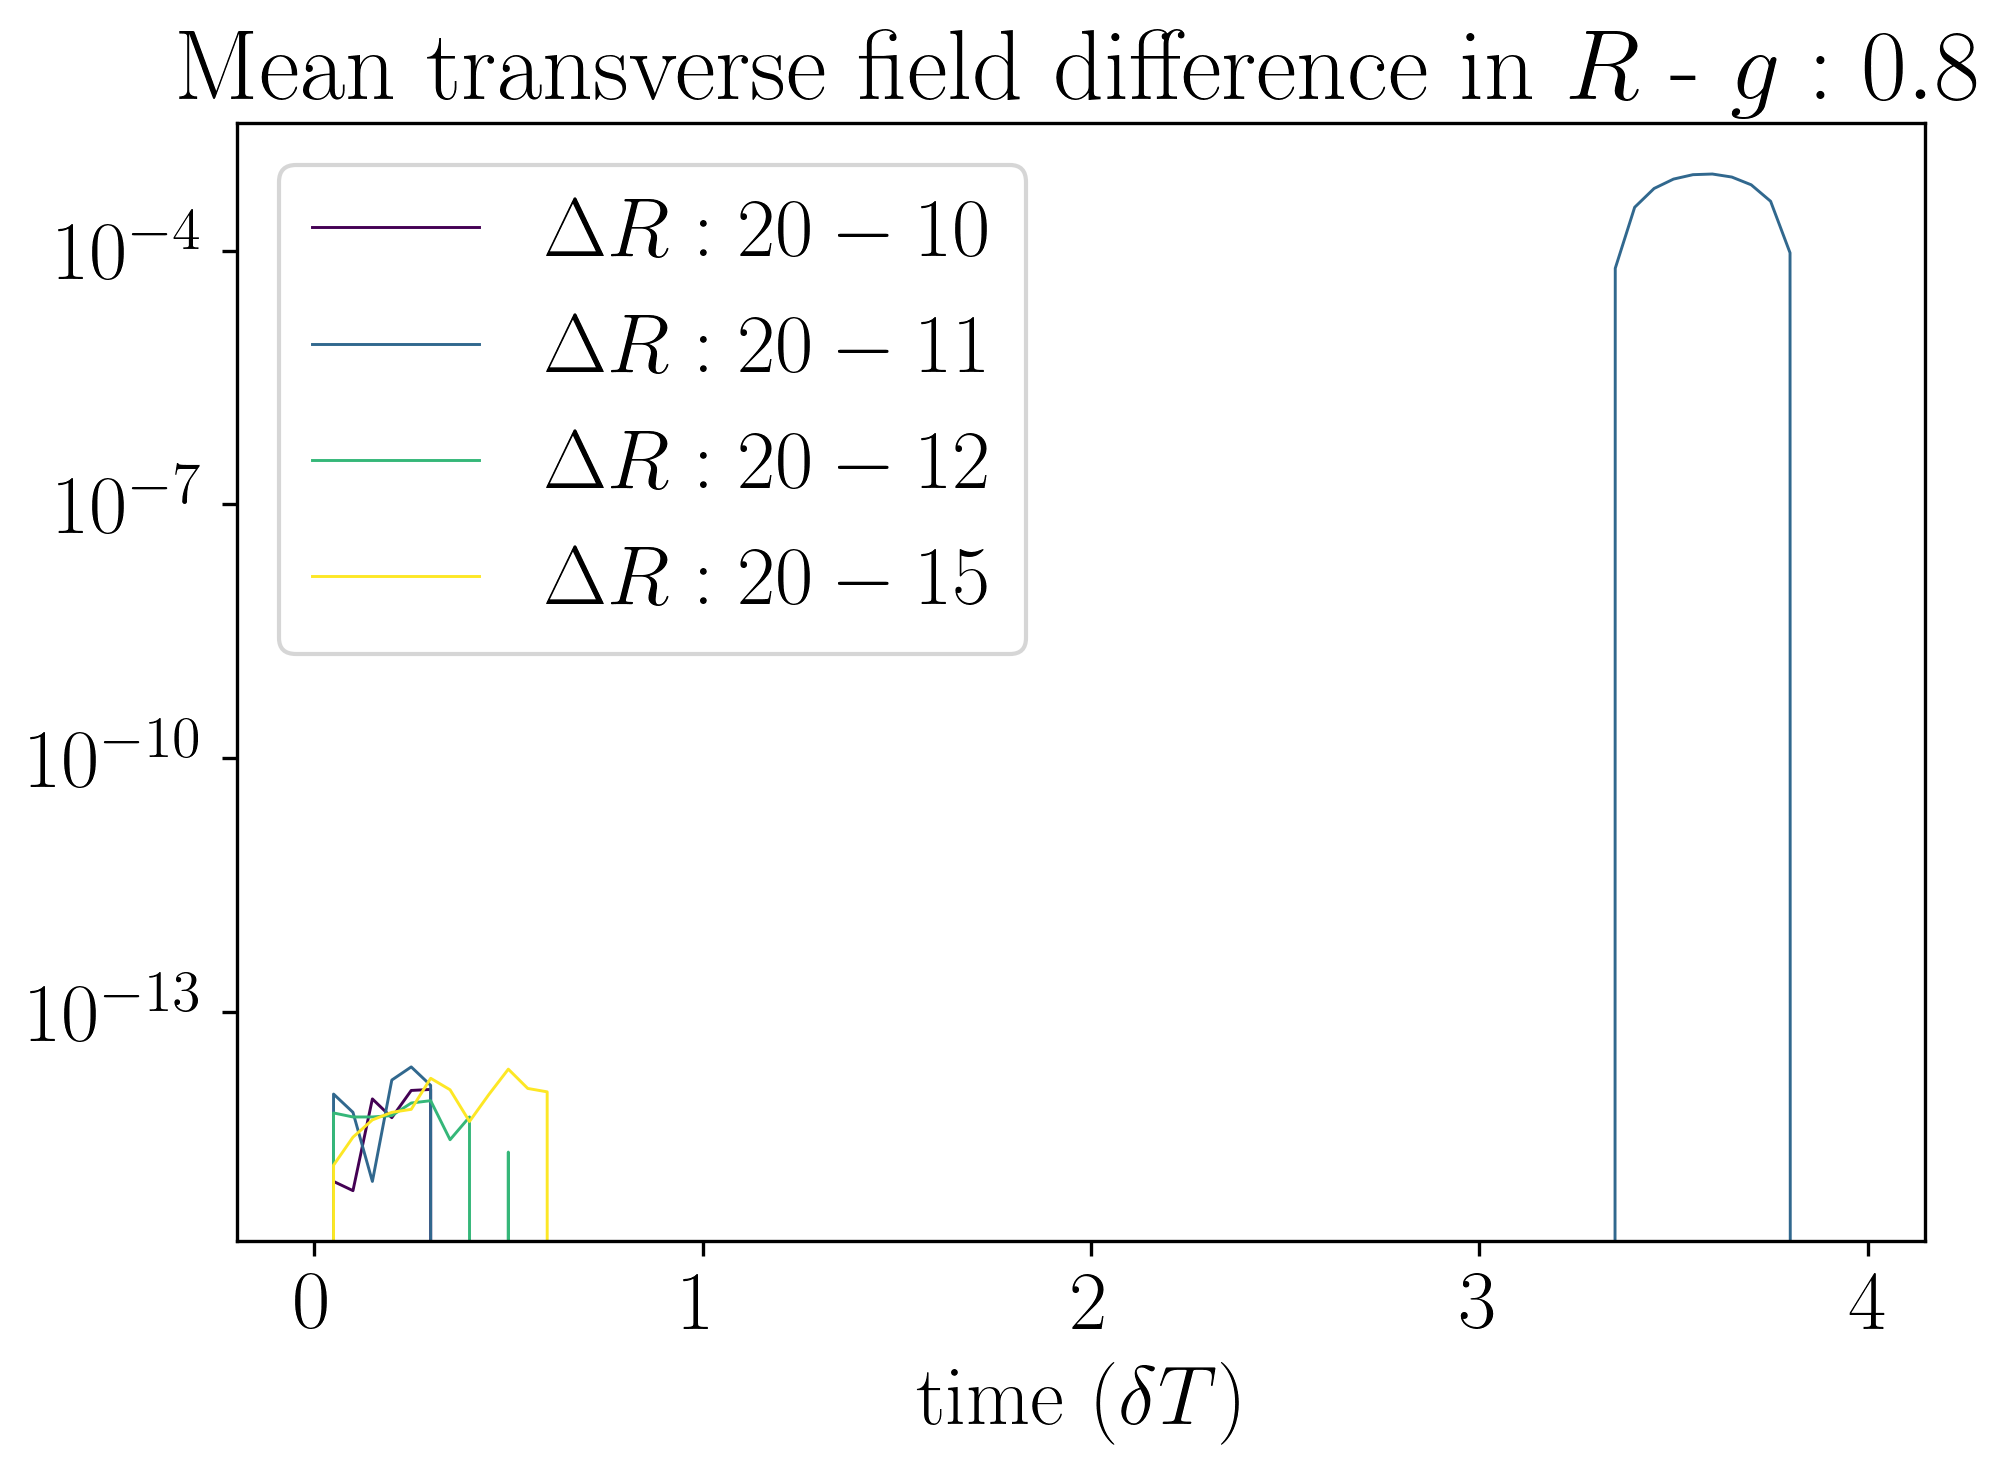

In [86]:
colors = create_sequential_colors(len(Rs)-1)

for i in range(len(arrs)-1):    
    plt.plot(delta*np.asarray(range(int((steps))))[::int(1/of)], (np.asarray(arrs)[-1] - np.asarray(arrs)[i]), linestyle="-", linewidth=0.7, markersize=5, color=colors[i], label=f"$\Delta R: {Rs[-1]} - {Rs[i]}$")
    # plt.legend().get_texts()[0].set_text(f"$g: {h_ev}$ $\chi: {chi}$")

plt.title(f"Mean transverse field difference in $R$ - $g: {h_ev}$")
plt.xlabel("time $(\\delta T)$")
plt.yscale("log")
plt.legend()